# Problem 1:  Exit Poll Prediction

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

### Upload Required Libraries

In [1]:
import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')

### Importing data

In [2]:
df = pd.read_excel("Election_Data.xlsx",sheet_name = 'Election_Dataset_Two Classes' )

In [3]:
# Check top few records to get a feel of the data structure
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male


### Shape

In [4]:
df.shape

(1525, 10)

### Data type of data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


checking for Possible columns which are categorical but are not having data type "object"

#### Making different list for categorical columns and numerical columns

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [8]:
cat=['vote',"gender"]
num =[x for x in df.columns if x not in cat] # list comprehension

print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


#### Summary Statistics for numerical and categorical columns

In [9]:
df[num].describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

#### Printing Categorical Values with their Counts

In [10]:
for catvar in cat:
    print(catvar,'  No of Levels:',df[catvar].nunique())
    print(df[catvar].value_counts())
    print('\n\n')

vote   No of Levels: 2
Labour          1063
Conservative     462
Name: vote, dtype: int64



gender   No of Levels: 2
female    812
male      713
Name: gender, dtype: int64





#### Check for Null Values 

In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No independent & Dependint  features have missing values

### Are there any duplicate records?
**Checking for Duplicate Records**

In [12]:
dups = df.duplicated()
dups.sum()

8

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

**There are 8 duplicate Values present in the Dataset so we have to drop them**

In [13]:
df.drop_duplicates(inplace=True) 

####  construct box plot for Numerical variables

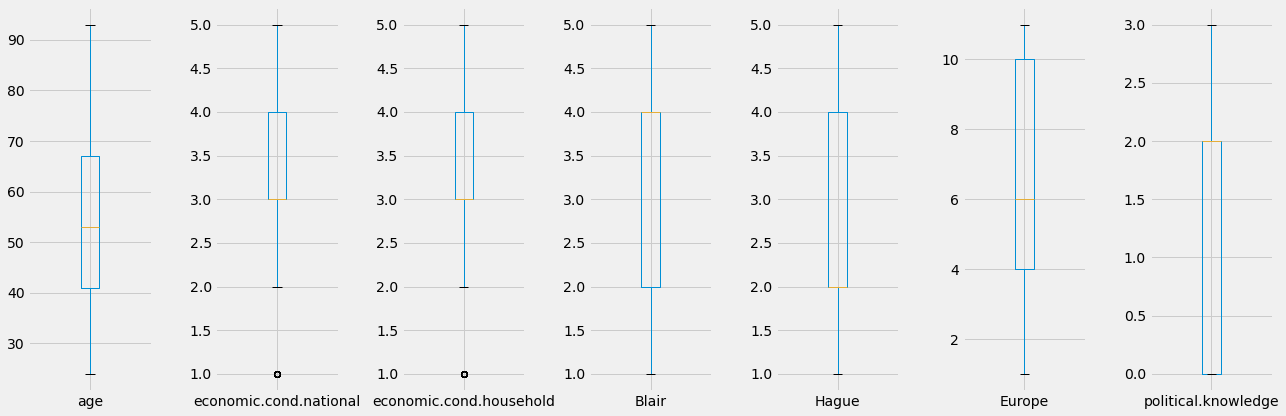

In [14]:

df[num].plot(kind = 'box', subplots = True, figsize = (18,6))
plt.tight_layout();

No outliers are present here in "age", & Other Columns econiomic conditions are ordinal Variables so the can't are not an Outiler (as per Outlier defination Outliers are those values which are Mistakenly Captured in the data)

#### As we can see that Age variable is having discreete values so to convert this to ordinal values we will use binning method as below

In [15]:
df['age_bins'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49,59,69,79,89,99],labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])


In [16]:
df['age_bins'].unique().sort_values()

['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Categories (8, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s' < '90s']

In [17]:
df.head(2)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   

   Europe  political.knowledge  gender age_bins  
0       2                    2  female      40s  
1       5                    2    male      30s

### Univariate Analysis

In [18]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

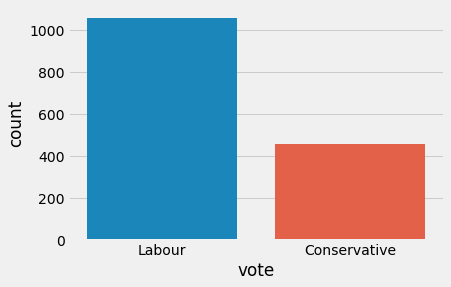

In [19]:
sns.countplot(df['vote']);

In [20]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

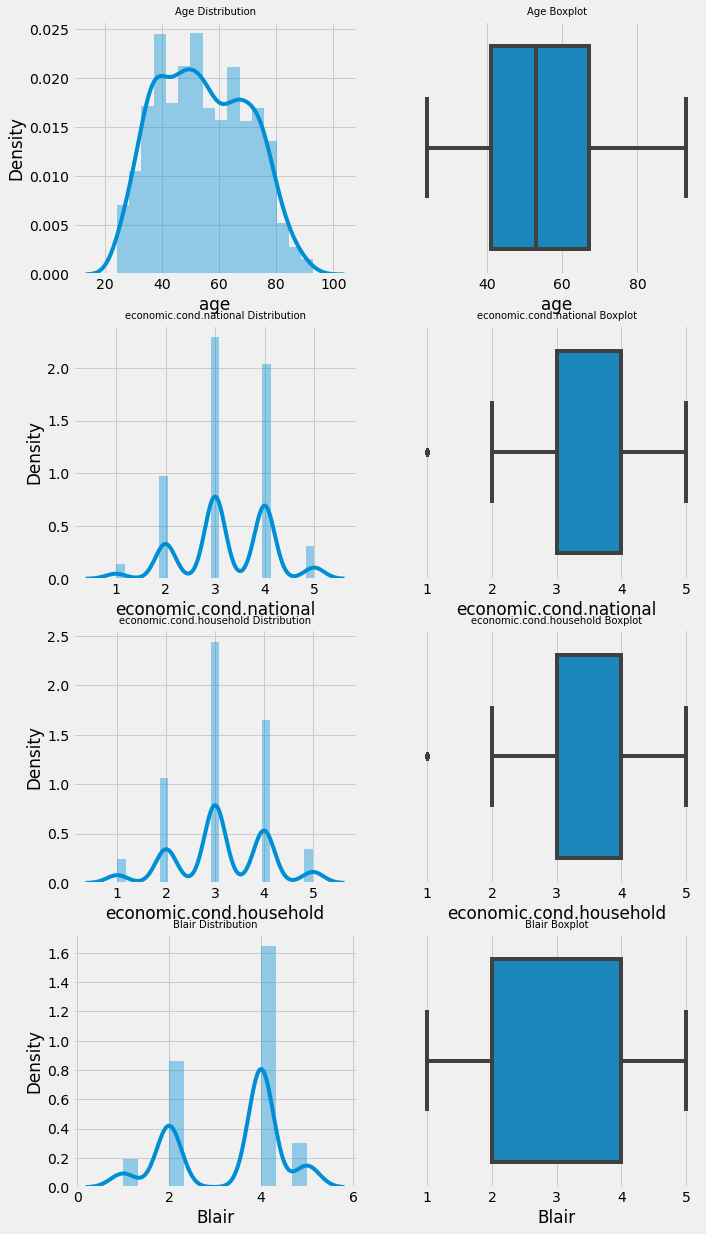

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10) # for subject reading

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10) # for subject reading

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10) #for subject writing

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10) # for subject writing


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10) # for subject math

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10) # for subject math

 
a = sns.distplot(df['Blair'] , ax=axes[3][0]) 
a.set_title("Blair Distribution",fontsize=10) # for subject science

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10); # for subject science

# plt.show()

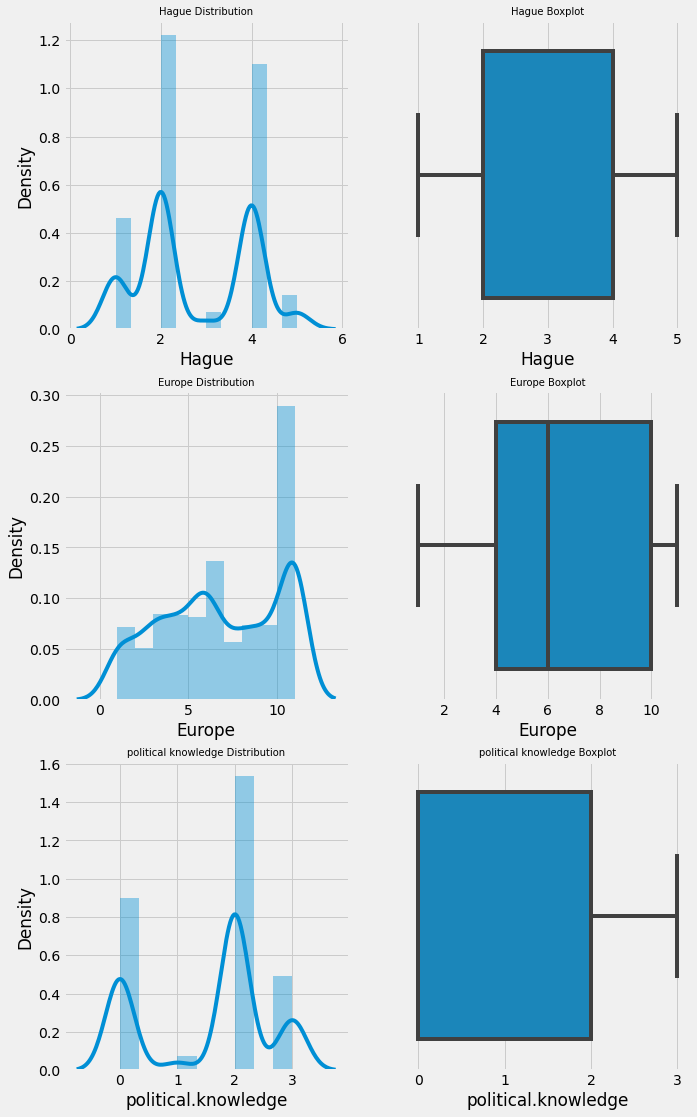

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political knowledge Boxplot",fontsize=10);
# plt.show()

In [23]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

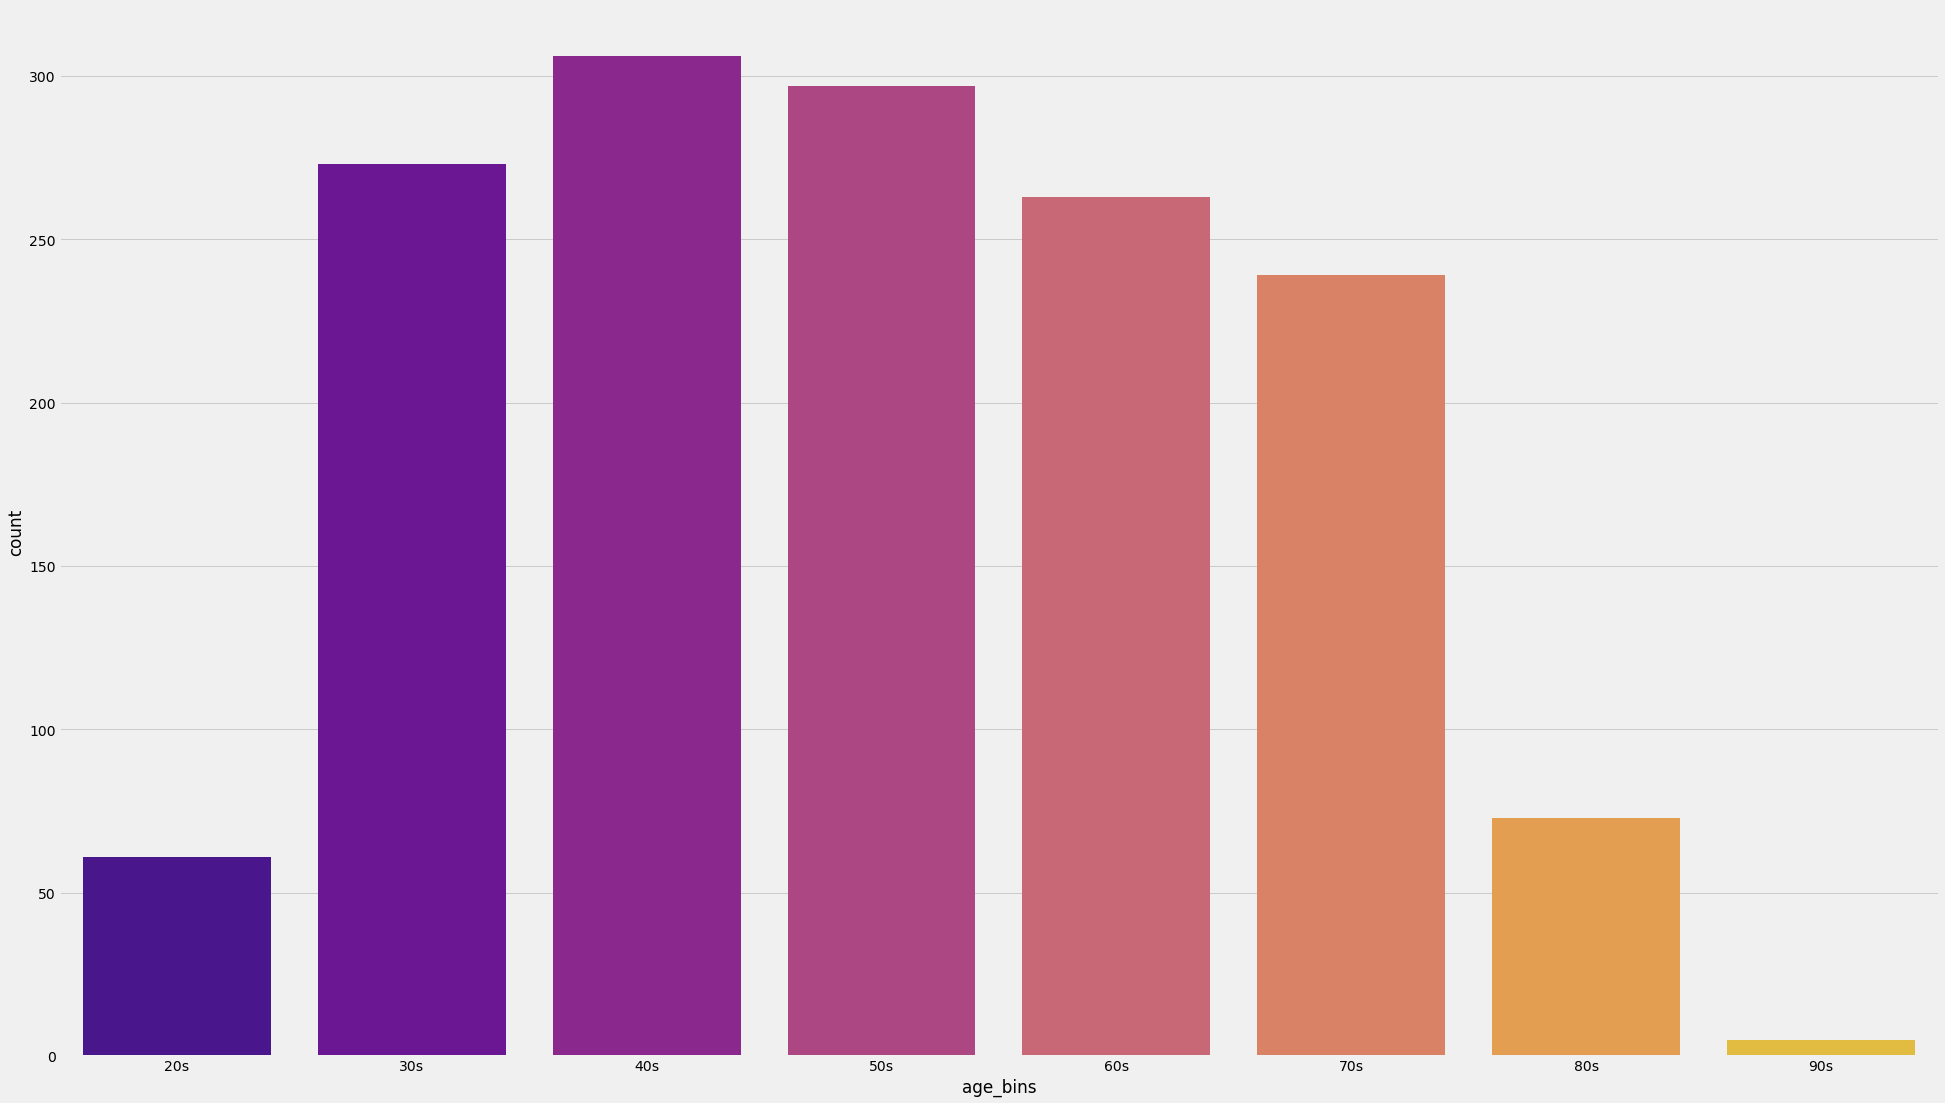

In [24]:
fig, ax = plt.subplots()

fig.set_size_inches(30, 18)
sns.countplot(df['age_bins'], ax=ax,palette='plasma');

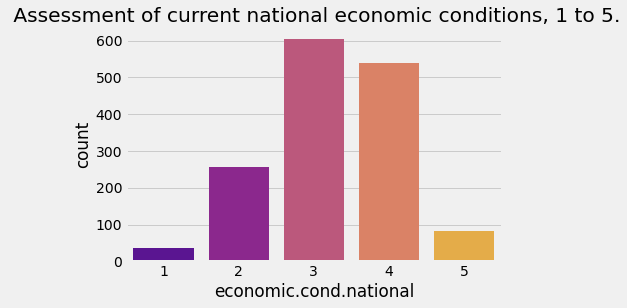

In [25]:
plt.title(' Assessment of current national economic conditions, 1 to 5.')
sns.countplot(df['economic.cond.national'],palette='plasma');

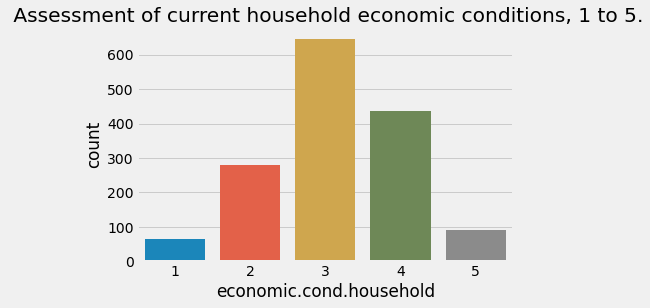

In [26]:
plt.title(' Assessment of current household economic conditions, 1 to 5.')
sns.countplot(df['economic.cond.household']);

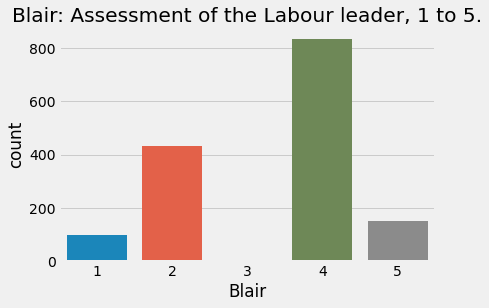

In [27]:
plt.title('Blair: Assessment of the Labour leader, 1 to 5.')
sns.countplot(df['Blair']);

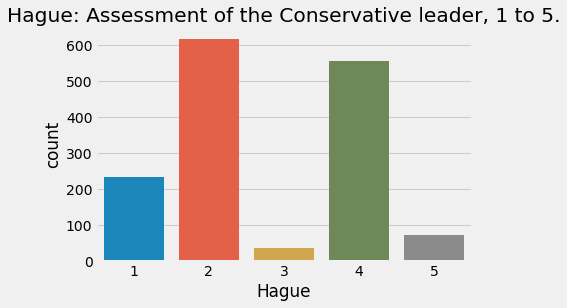

In [28]:
plt.title('Hague: Assessment of the Conservative leader, 1 to 5.')
sns.countplot(df['Hague']);

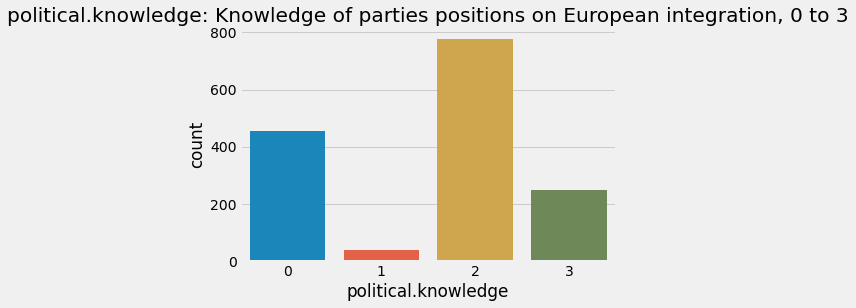

In [29]:
plt.title('political.knowledge: Knowledge of parties positions on European integration, 0 to 3')
sns.countplot(df['political.knowledge']);

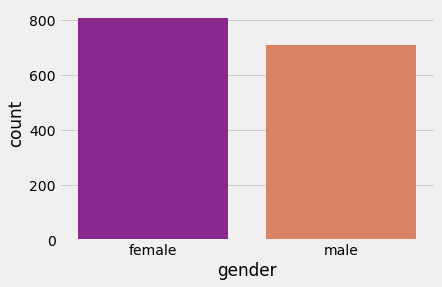

In [30]:

sns.countplot(df['gender'],palette='plasma');

###  Bivariate and Multivariate Analysis

In [31]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender',
       'age_bins'],
      dtype='object')

<AxesSubplot:xlabel='age_bins', ylabel='count'>

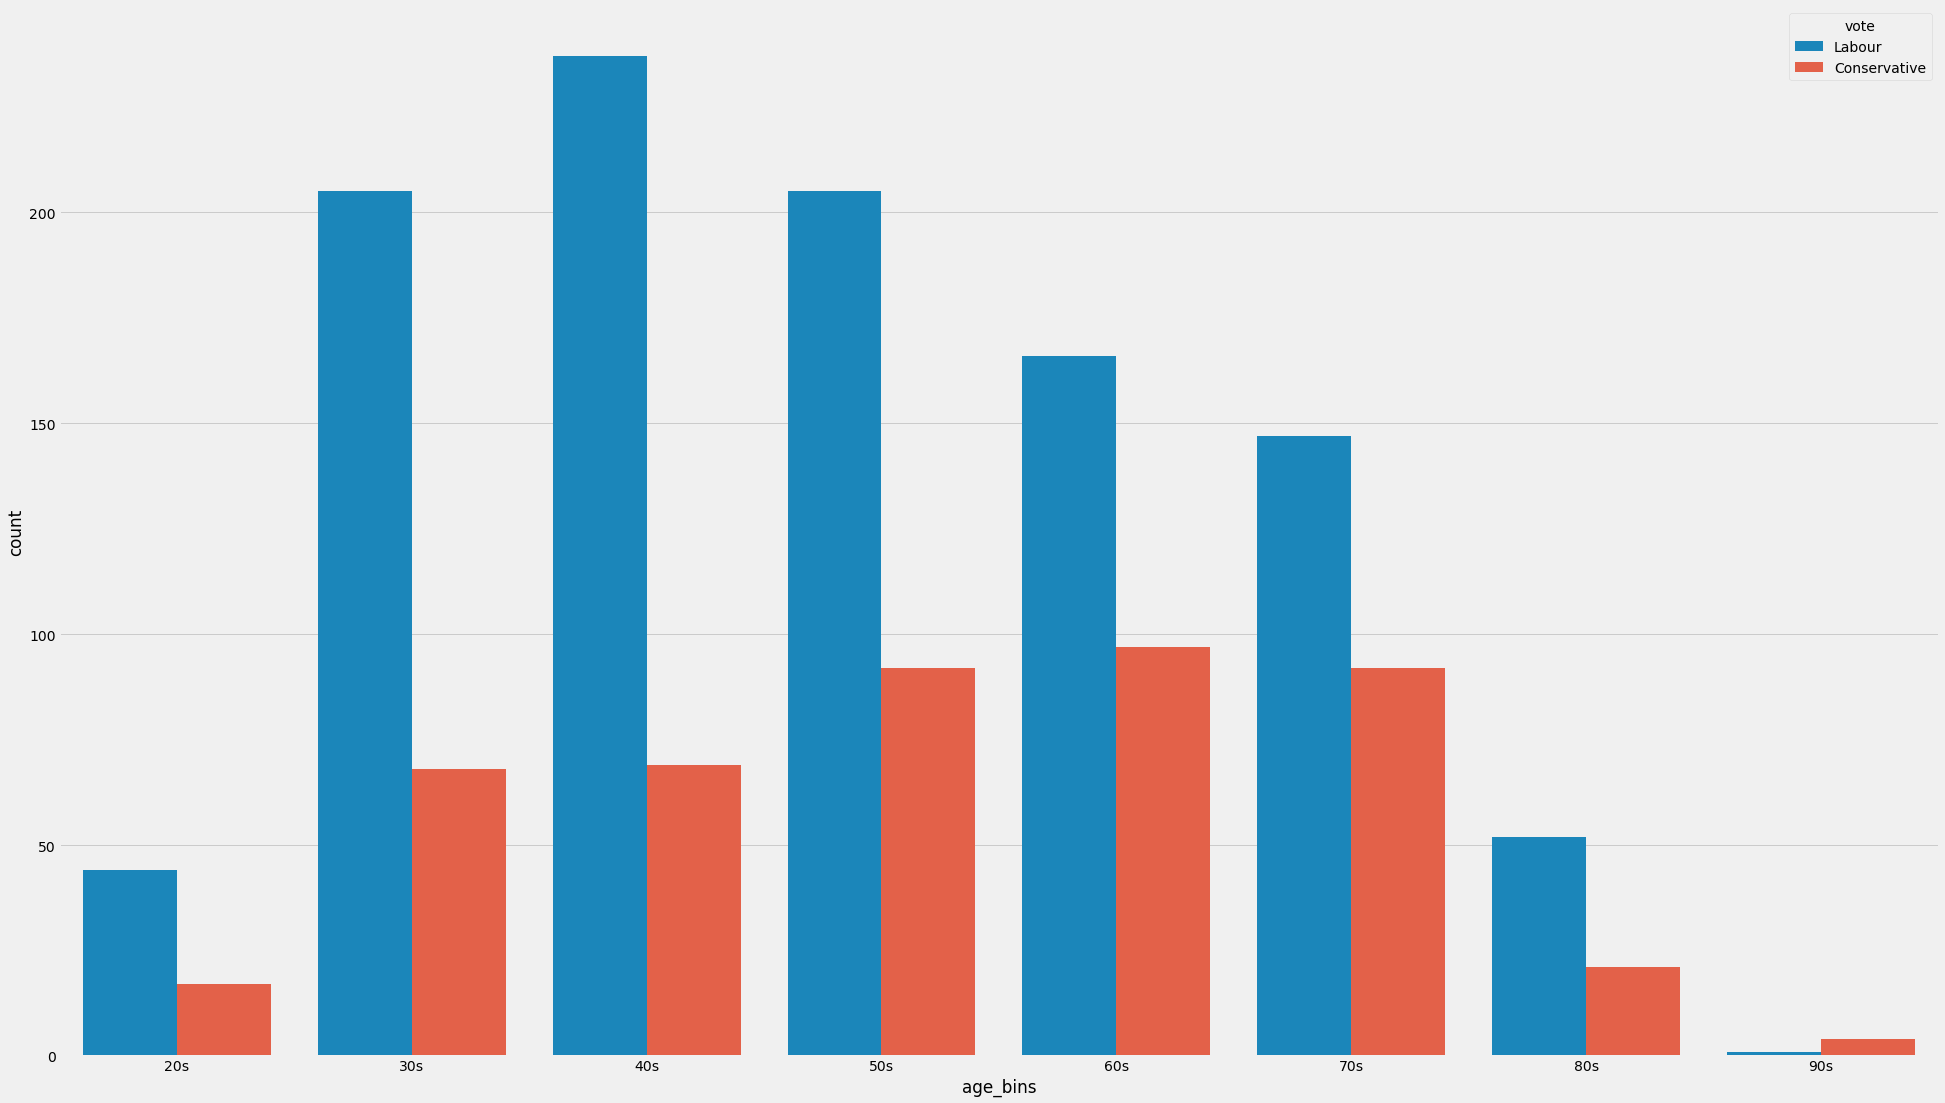

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 18)
 
sns.countplot(x="age_bins", data=df, hue='vote')

**Above plot represents Labour Party is getting More Votes in each Age Group**

<AxesSubplot:title={'center':'economic.cond.national: Assessment of current national economic conditions, 1 to 5.'}, xlabel='economic.cond.national', ylabel='count'>

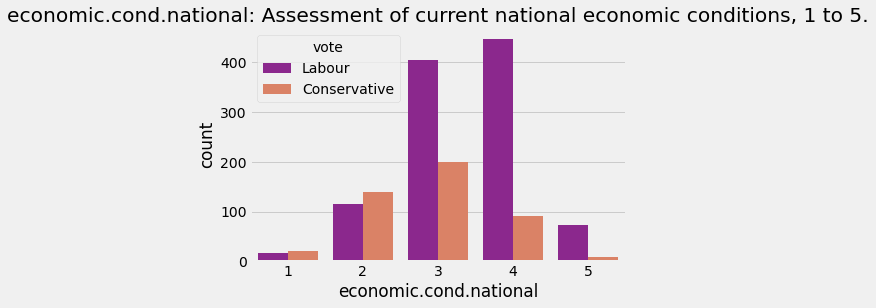

In [33]:
plt.title('economic.cond.national: Assessment of current national economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.national", data=df, hue='vote',palette='plasma')

<AxesSubplot:title={'center':'economic.cond.household: Assessment of current household economic conditions, 1 to 5.'}, xlabel='economic.cond.household', ylabel='count'>

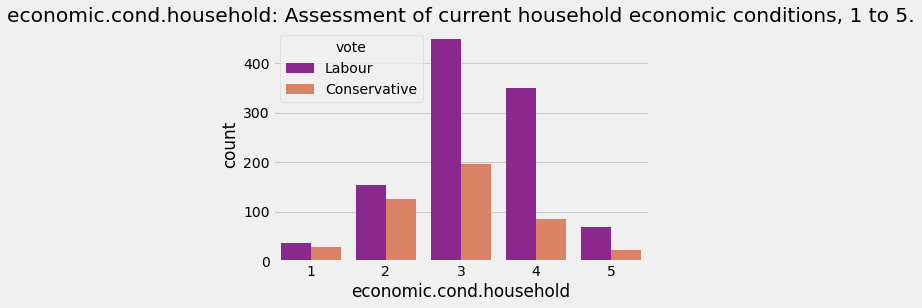

In [34]:
plt.title('economic.cond.household: Assessment of current household economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.household", data=df, hue='vote',palette='plasma')

<AxesSubplot:title={'center':'Blair: Assessment of the Labour leader, 1 to 5.'}, xlabel='Blair', ylabel='count'>

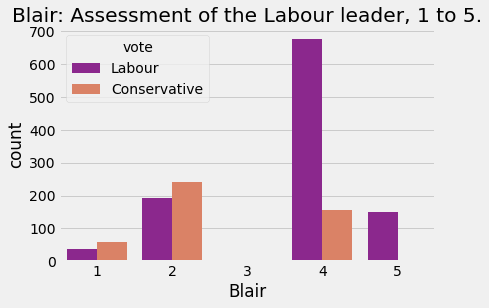

In [35]:
plt.title('Blair: Assessment of the Labour leader, 1 to 5.')
sns.countplot(x="Blair", data=df, hue='vote',palette='plasma')

<AxesSubplot:title={'center':'Hague: Assessment of the Conservative leader, 1 to 5.'}, xlabel='Hague', ylabel='count'>

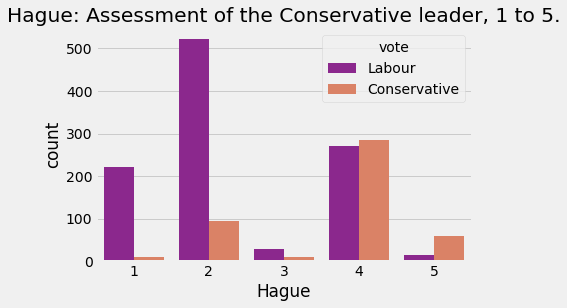

In [36]:
plt.title('Hague: Assessment of the Conservative leader, 1 to 5.')
sns.countplot(x="Hague", data=df, hue='vote',palette='plasma')

<AxesSubplot:title={'center':' Europe: an 11-point scale that measures respondents attitudes toward European integration'}, xlabel='Europe', ylabel='count'>

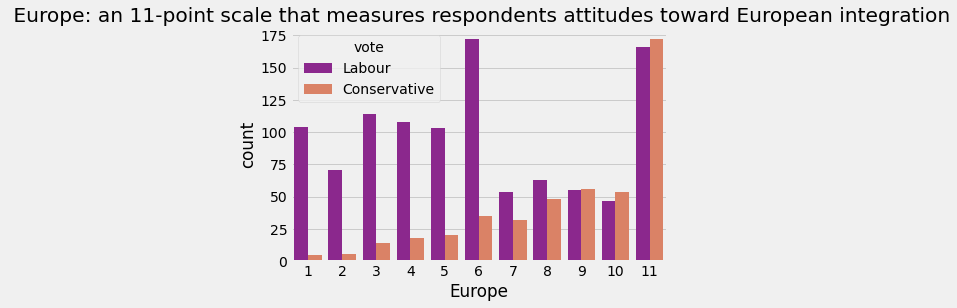

In [37]:
plt.title(' Europe: an 11-point scale that measures respondents attitudes toward European integration')
sns.countplot(x="Europe", data=df, hue='vote',palette='plasma')

**Euroscepticism, also known as EU-scepticism, means criticism of the European Union (EU) and European integration**

<AxesSubplot:title={'center':' political.knowledge: Knowledge of parties positions on European integration, 0 to 3.'}, xlabel='political.knowledge', ylabel='count'>

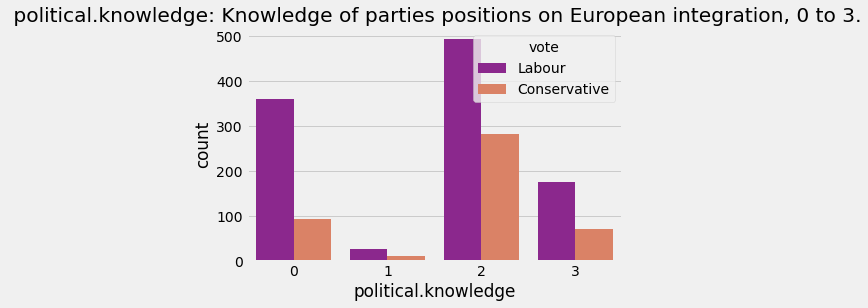

In [38]:
plt.title(' political.knowledge: Knowledge of parties positions on European integration, 0 to 3.')
sns.countplot(x="political.knowledge", data=df, hue='vote',palette='plasma')

<AxesSubplot:xlabel='gender', ylabel='count'>

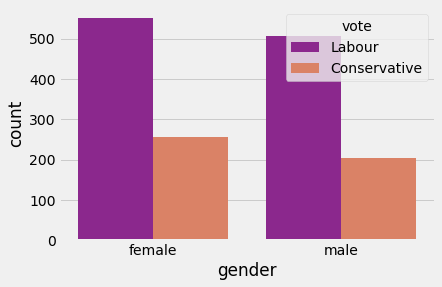

In [39]:

sns.countplot(x="gender", data=df, hue='vote',palette='plasma')

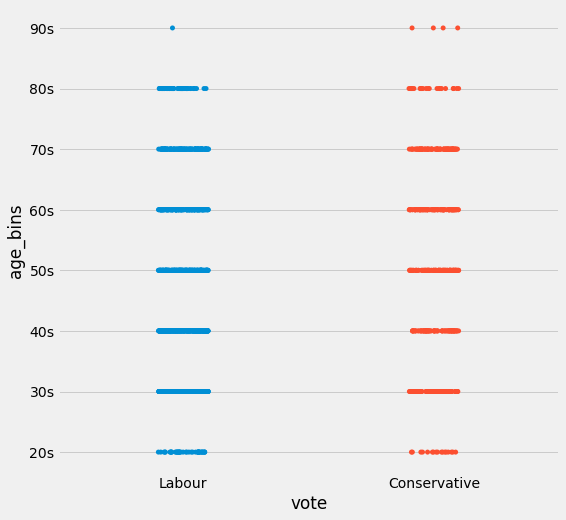

In [40]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'], df['age_bins'].sort_values(), jitter=True) 
plt.show()

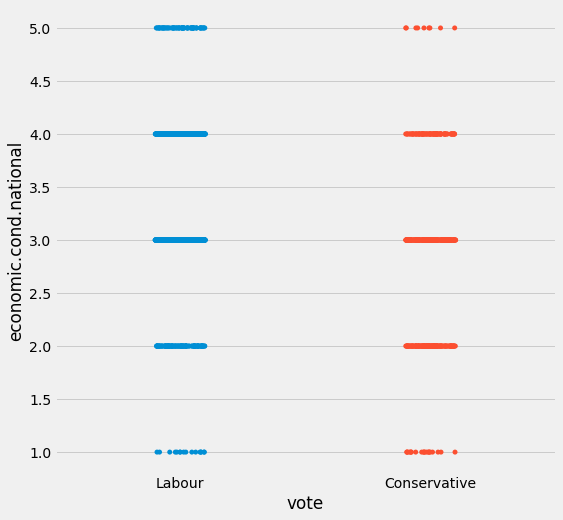

In [41]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

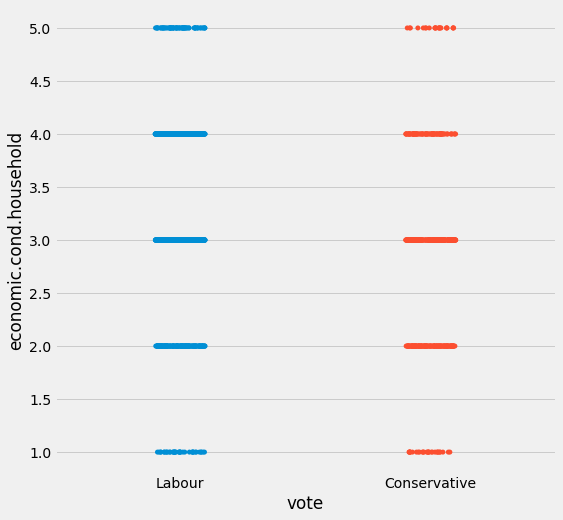

In [42]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

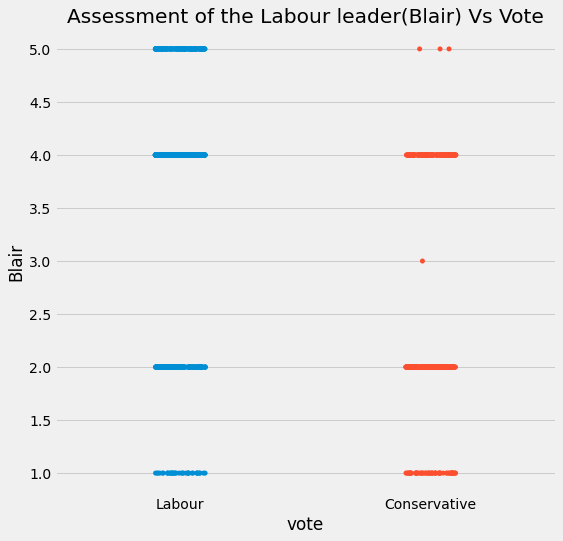

In [43]:
plt.figure(figsize=(8,8))
plt.title('Assessment of the Labour leader(Blair) Vs Vote')
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

**Average Rating for Assessment of the Labour leader(Blair) is good**


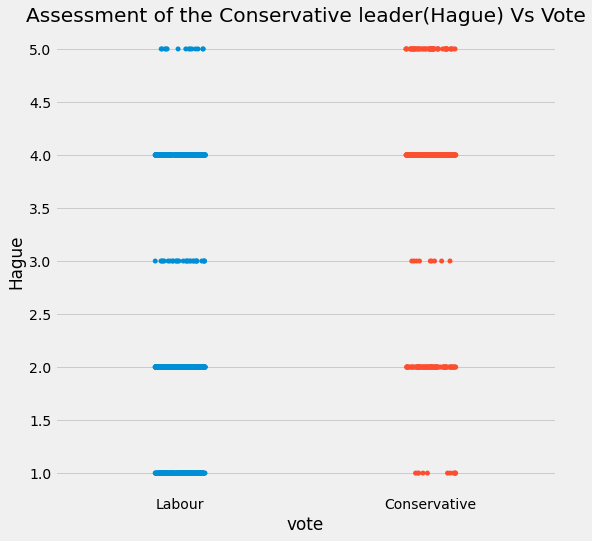

In [44]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True)
plt.title('Assessment of the Conservative leader(Hague) Vs Vote')
plt.show()

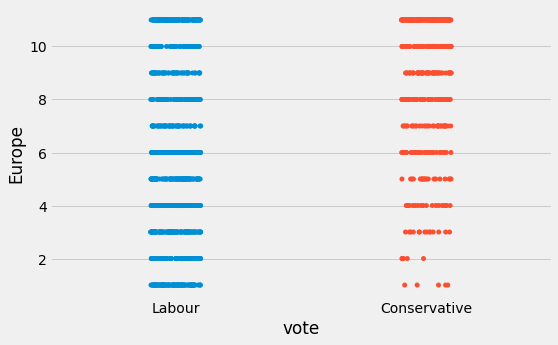

In [45]:
# Europe: an 11-point scale that measures respondents' attitudes toward European integration. 
# High scores represent ‘Eurosceptic’ sentiment.
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

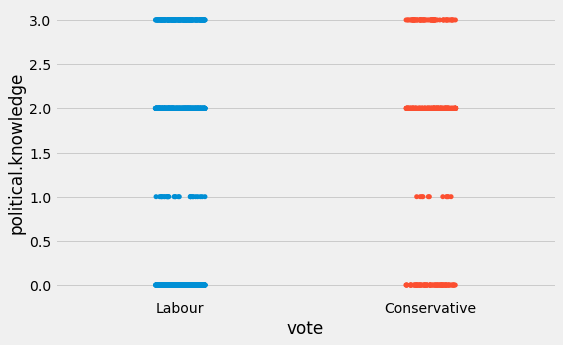

In [46]:
# political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

#### Checking Correlation

In [47]:
df.corr()

age  economic.cond.national  \
age                      1.000000                0.018687   
economic.cond.national   0.018687                1.000000   
economic.cond.household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political.knowledge     -0.046598               -0.023510   

                         economic.cond.household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic.cond.national                  0.347687  0.326141 -0.200790   
economic.cond.household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political.knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political.knowledge  
age                      0.064562            -0.046598  
economic.cond.national  -0.209150            -0.023510  
economic.cond.household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political.knowledge     -0.151197             1.000000

### Correlation Plot

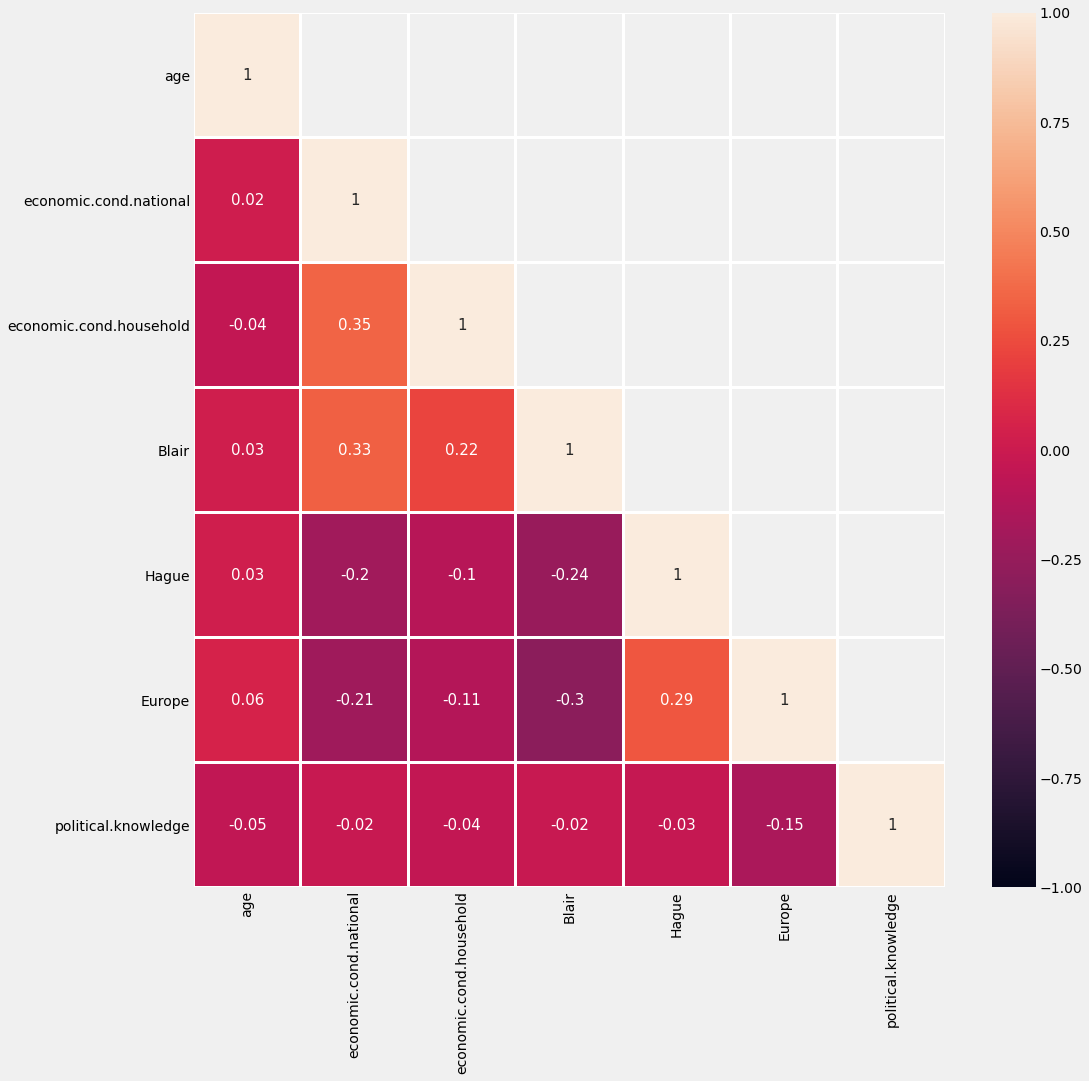

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(2),annot=True, 
            mask = np.triu(np.ones_like(df.corr()),1),
           vmin =-1, vmax=1, linewidths=2, annot_kws={'size':15});


### Heat map

<AxesSubplot:>

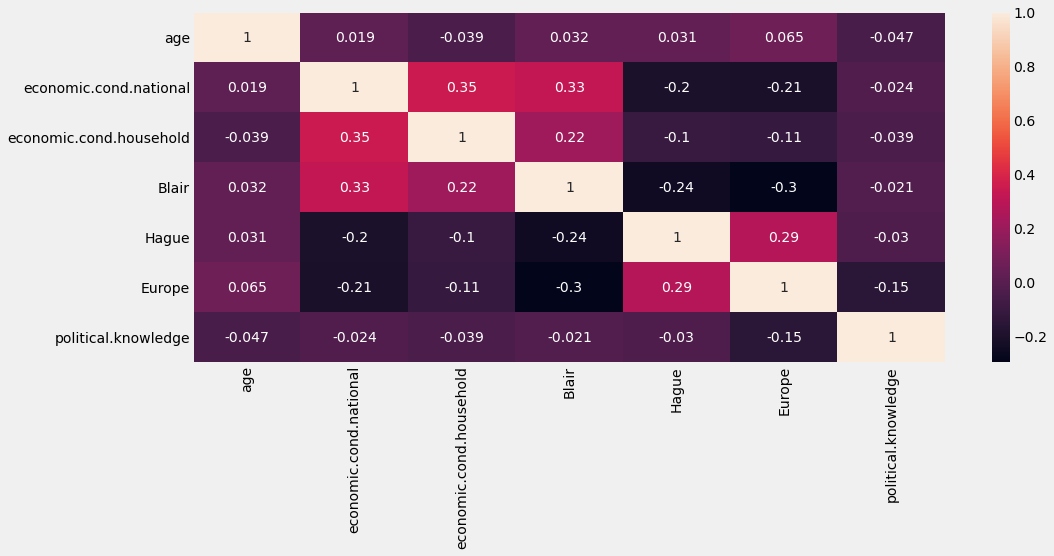

In [49]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

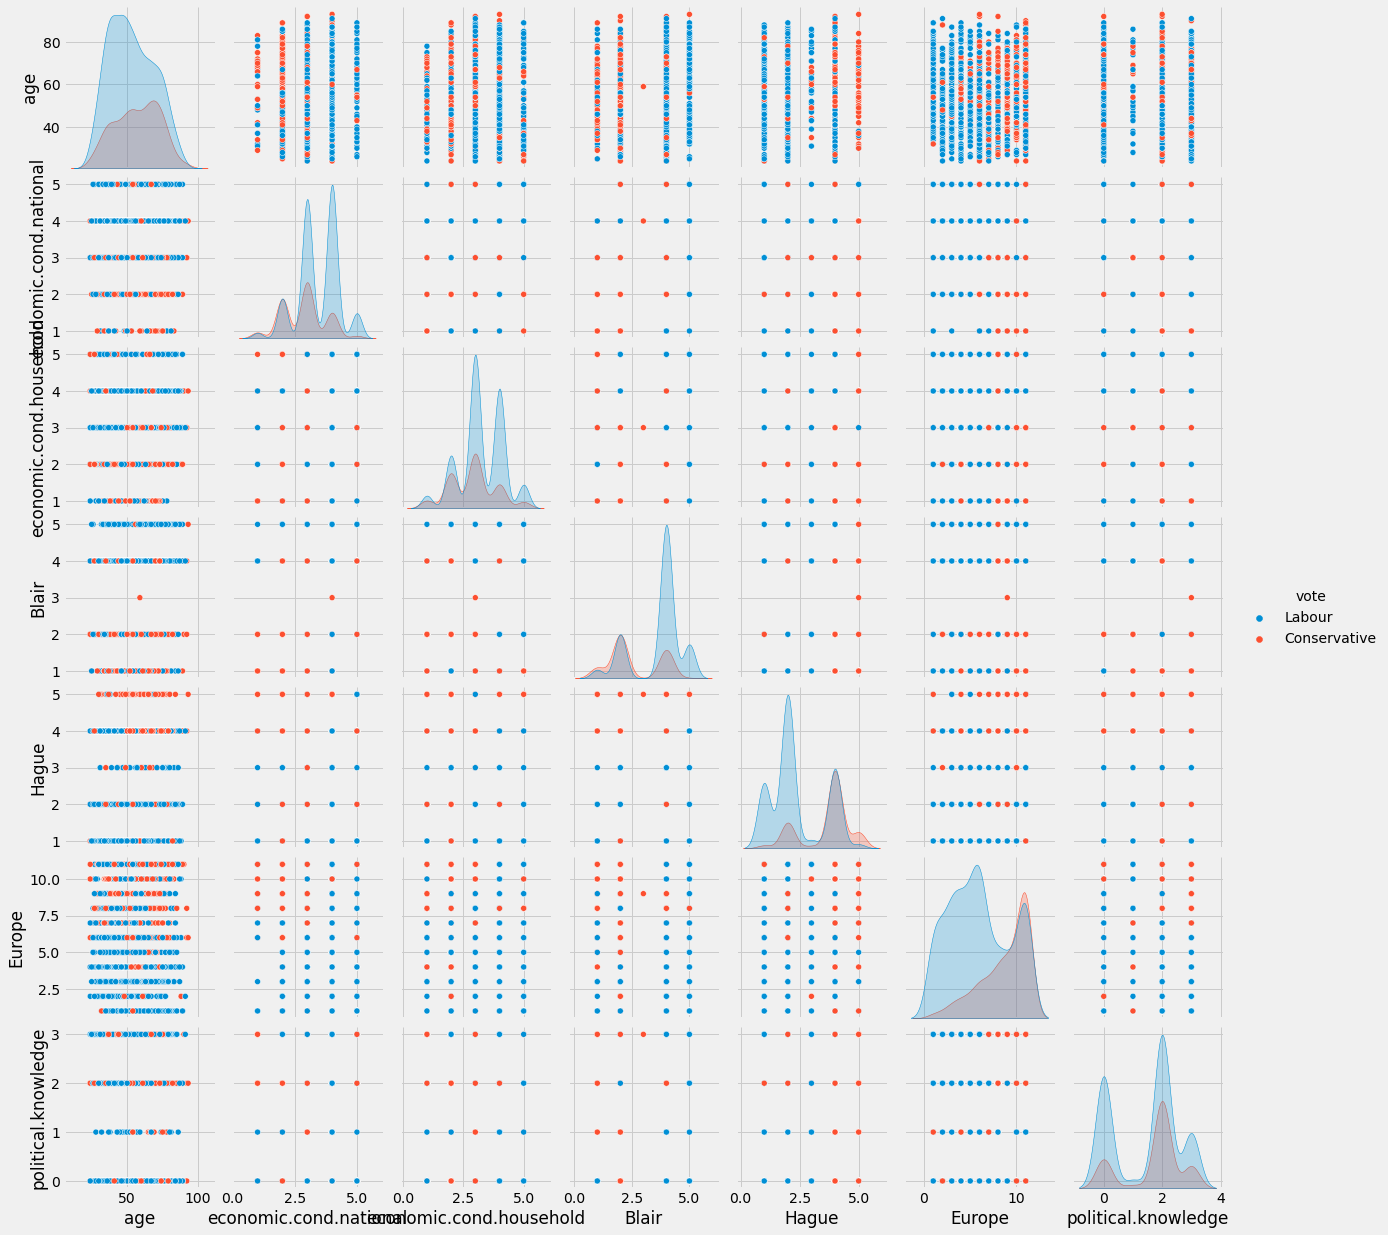

In [50]:
sns.pairplot(df,hue ='vote');

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

###  Dummy Variable one hot Encoding for Gender 

In [51]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [52]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge age_bins  gender_male  
0       2                    2      40s            0  
1       5                    2      30s            1  
2       3                    2      30s            1  
3       4                    0      20s            0  
4       6                    2      40s            1

In [53]:
df.drop("age",axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   economic.cond.national   1517 non-null   int64   
 2   economic.cond.household  1517 non-null   int64   
 3   Blair                    1517 non-null   int64   
 4   Hague                    1517 non-null   int64   
 5   Europe                   1517 non-null   int64   
 6   political.knowledge      1517 non-null   int64   
 7   age_bins                 1517 non-null   category
 8   gender_male              1517 non-null   uint8   
dtypes: category(1), int64(6), object(1), uint8(1)
memory usage: 130.4+ KB


### Ordinal Encoding of Age bins

In [55]:
feature = "age_bins"
df["age_bins"] = pd.Categorical(df["age_bins"]).codes

In [56]:
df.head()

vote  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour                       3                        3      4      1   
1  Labour                       4                        4      4      4   
2  Labour                       4                        4      5      2   
3  Labour                       4                        2      2      1   
4  Labour                       2                        2      1      1   

   Europe  political.knowledge  age_bins  gender_male  
0       2                    2         2            0  
1       5                    2         1            1  
2       3                    2         1            1  
3       4                    0         0            0  
4       6                    2         2            1

### Scaling

In [57]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

Text(0.5, 1.0, 'Data Range ')

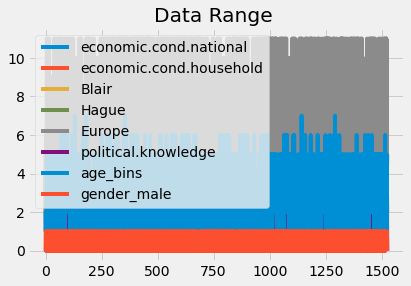

In [58]:
df.plot()
plt.title("Data Range ")

**Since Above figure shows that points rangess are 0 -11 and most of the variables are ordinal variables so there is no need of scaling**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   int64 
 2   economic.cond.household  1517 non-null   int64 
 3   Blair                    1517 non-null   int64 
 4   Hague                    1517 non-null   int64 
 5   Europe                   1517 non-null   int64 
 6   political.knowledge      1517 non-null   int64 
 7   age_bins                 1517 non-null   int8  
 8   gender_male              1517 non-null   uint8 
dtypes: int64(6), int8(1), object(1), uint8(1)
memory usage: 130.1+ KB


### Checking the Distributions of class -i.e. Vote 

In [60]:
df.groupby(["vote"]).count()

economic.cond.national  economic.cond.household  Blair  Hague  \
vote                                                                          
Conservative                     460                      460    460    460   
Labour                          1057                     1057   1057   1057   

              Europe  political.knowledge  age_bins  gender_male  
vote                                                              
Conservative     460                  460       460          460  
Labour          1057                 1057      1057         1057

### Data Split: Split the data into train and test (70:30)

#### Train-Test Split

In [61]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [62]:
X.head()

economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0                       3                        3      4      1       2   
1                       4                        4      4      4       5   
2                       4                        4      5      2       3   
3                       4                        2      2      1       4   
4                       2                        2      1      1       6   

   political.knowledge  age_bins  gender_male  
0                    2         2            0  
1                    2         1            1  
2                    2         1            1  
3                    0         0            0  
4                    2         2            1

In [63]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [64]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 8)
X_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### LOGISTIC REGRESSION

In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,recall_score
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',
                           max_iter=10000,
                           penalty='none',verbose=True,
                           n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    7.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset LOGISTIC REGRESSION


In [68]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [69]:
### Getting the Predicted Classes and Probs

In [70]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.430059  0.569941
1  0.153130  0.846870
2  0.006441  0.993559
3  0.832957  0.167043
4  0.072029  0.927971

In [71]:
###  Model Evaluation

In [72]:
# Accuracy - Training Data
LR_train_score= model.score(X_train, y_train)
LR_train_score
LR_train_recall_score_Labour = recall_score(y_train,ytrain_predict,labels=None,pos_label='Labour')
LR_train_recall_score_Conservative = recall_score(y_train,ytrain_predict,labels=None,pos_label='Conservative')
print(LR_train_score,LR_train_recall_score_Conservative,LR_train_recall_score_Labour)

0.8303487276154571 0.6351791530944625 0.9098143236074271


AUC: 0.88993


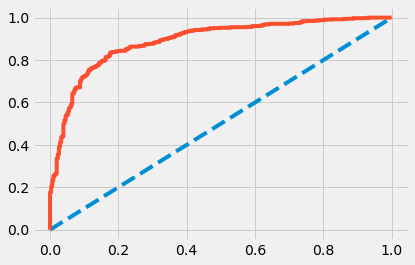

In [73]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [74]:
# Accuracy - Test Data
LR_test_score =model.score(X_test, y_test)
LR_test_score
LR_test_recall_score_Labour = recall_score(y_test,ytest_predict,labels=None,pos_label='Labour')
LR_test_recall_score_Conservative = recall_score(y_test,ytest_predict,labels=None,pos_label='Conservative')
print(LR_test_score,LR_test_recall_score_Conservative,LR_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


### AUC and ROC for the test data Logistic Regression

AUC: 0.88332


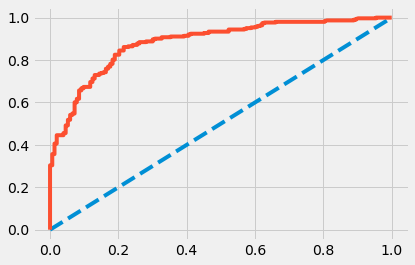

In [75]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour') 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data Logistic Regression

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061



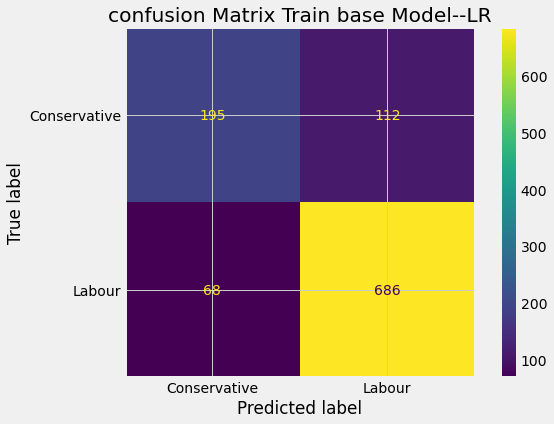

In [76]:
print(classification_report(y_train, ytrain_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Train base Model--LR")
plot_confusion_matrix(model,X_train,y_train, ax=ax);

### Confusion Matrix for test data

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



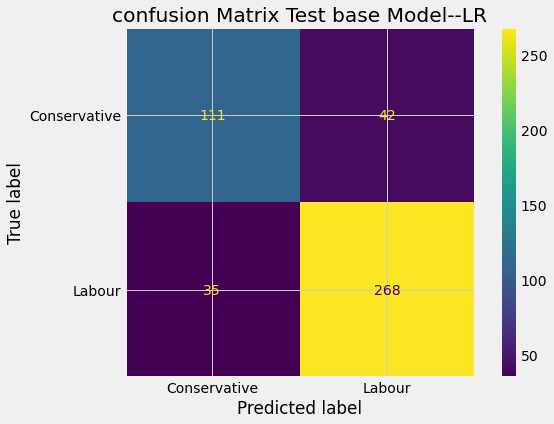

In [77]:
print(classification_report(y_test, ytest_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Test base Model--LR")
plot_confusion_matrix(model,X_test,y_test,ax=ax);

0.8899333845981043 0.8833236264802949


Text(0.5, 1.0, 'ROC-AUC Curve Base Model -LR')

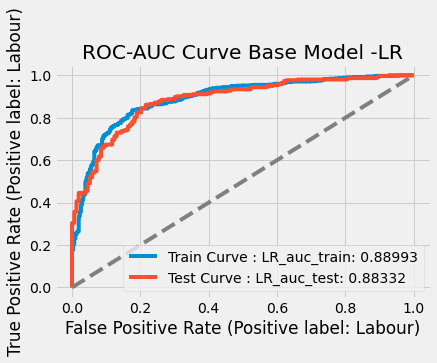

In [78]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve Base Model -LR')

### Tuning of Logistic Regression Model

In [79]:
#### Applying GridSearchCV for Logistic Regressio

In [80]:
grid={'penalty':['l2','l1'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [81]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [82]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 3,n_jobs=-1,scoring='accuracy')

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'l1'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [84]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [85]:
grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [86]:
best_model = grid_search.best_estimator_

In [87]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [88]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.429550  0.570450
1  0.154899  0.845101
2  0.006596  0.993404
3  0.830211  0.169789
4  0.073427  0.926573

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrix Train Data of Tuned Model- LR')

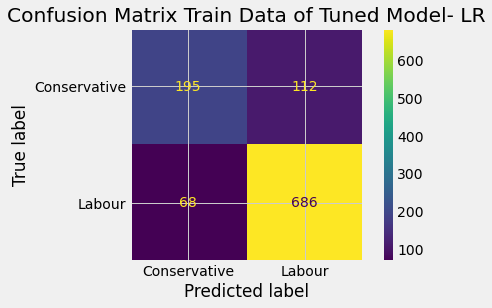

In [89]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');

plot_confusion_matrix(best_model,X_train,y_train);
plt.title('Confusion Matrix Train Data of Tuned Model- LR')

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Text(0.5, 1.0, 'Confusion Matrix Test Data of Tuned Model- LR')

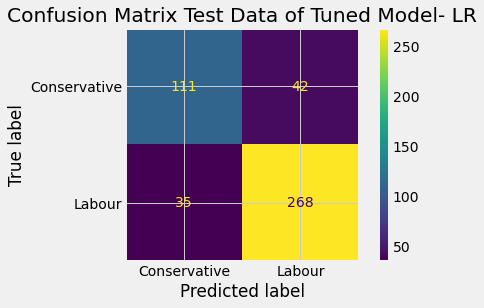

In [90]:
## Confusion matrix & Classification Report on the test data
print(classification_report(y_test, ytest_predict),'\n');
plot_confusion_matrix(best_model,X_test,y_test);
plt.title('Confusion Matrix Test Data of Tuned Model- LR')

In [91]:
LR_train_predict_prob = best_model.predict_proba(X_train)
LR_test_predict_prob = best_model.predict_proba(X_test)
LR_pred_train_prob = best_model.predict_proba(X_train)
LR_pred_test_prob = best_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -LR -Tuned Model')

0.8900025056376848 0.883366768049354


Text(0.5, 1.0, 'ROC-AUC Curve -LR -Tuned Model')



### Discriminant Analysis

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Training Performance LDA

In [93]:
## Performance Matrix on train data set
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score_Labour = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Labour')
LDA_train_recall_score_Conservative = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Conservative')
print(LDA_train_score,LDA_train_recall_score_Conservative,LDA_train_recall_score_Labour)

0.8331762488218661 0.6514657980456026 0.9071618037135278


In [94]:
LDA_train_predict

array(['Conservative', 'Labour', 'Labour', ..., 'Labour', 'Labour',
       'Labour'], dtype='<U12')

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix on Train Data Base Model -LDA')

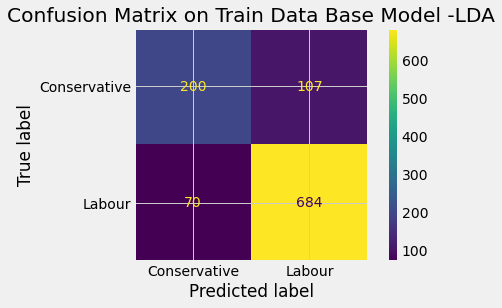

In [95]:
# Confusion Matrix on Train Data -LDA & classification Report
print(classification_report(y_train, LDA_train_predict))
plot_confusion_matrix(LDA_model,X_train,y_train);
plt.title('Confusion Matrix on Train Data Base Model -LDA')

### Test Performance LDA

In [96]:
## Performance Matrix on test data set
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score_Labour = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Labour')
LDA_test_recall_score_Conservative = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Conservative')
print(LDA_test_score,LDA_test_recall_score_Conservative,LDA_test_recall_score_Labour)

0.8377192982456141 0.7254901960784313 0.8943894389438944


              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



Text(0.5, 1.0, 'Confusion Matrix on Test Data Base Model -LDA')

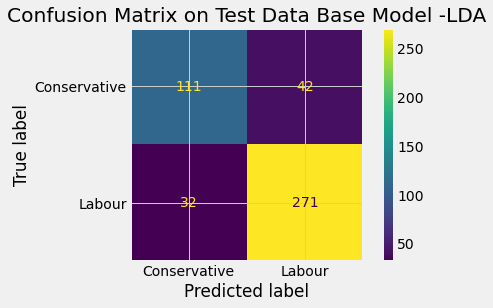

In [97]:
print(classification_report(y_test, LDA_test_predict))
plot_confusion_matrix(LDA_model,X_test,y_test);
plt.title('Confusion Matrix on Test Data Base Model -LDA')

### Probability prediction for the training and test data -LDA


In [98]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
# sklearn.metrics.plot_roc_curve

In [99]:
pred_train_prob = LDA_model.predict_proba(X_train)
pred_test_prob = LDA_model.predict_proba(X_test)

auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

In [100]:
pred_train_prob 
# we are interested in the probability of the class being 1
# hence we will be extracting the second column in the output below
# using pred_train_prob[:,1]
# using pred_train_prob[:,1][0] gives the prob prediction for the first
# row, pred_train_prob[:,1][1] gives the prob prediction for the second
#row and so on. we will use this in a loop below

array([[0.95076594, 0.04923406],
       [0.08683344, 0.91316656],
       [0.31984175, 0.68015825],
       ...,
       [0.22039572, 0.77960428],
       [0.22514368, 0.77485632],
       [0.01674761, 0.98325239]])

Text(0.5, 1.0, 'ROC Curve -LDA Base Model')

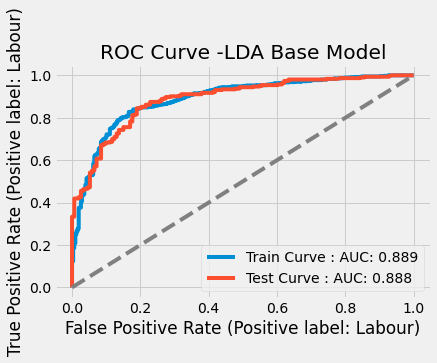

In [101]:
fig,ax = plt.subplots()
plot_roc_curve(LDA_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : AUC: '+str(round(auc_train,3)));
plot_roc_curve(LDA_model, X_test, y_test, ax=ax,
              label = 'Test Curve : AUC: '+ str(round(auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Base Model')

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


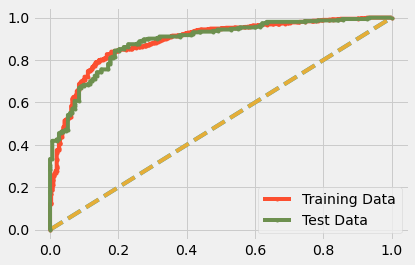

In [102]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Default Threshold Probability

In [103]:
from sklearn.metrics import accuracy_score,f1_score, recall_score

In [104]:
thresh = [] # empty list to store threshold values
acc = [] # empty list to store accuracy for various threshold values
f1_scr = [] # empty list to store F1 score for various...
rec = [] # empty list to store recall score for various...

for j in np.arange(0.1,1,0.1):
    thresh.append(j)
    custom_prob = j #defining the custom cut-off/threshold probability value of our choice
    custom_cutoff_data=[]#defining an empty list to store category pred
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if pred_train_prob[:,1][i] > custom_prob:#checking the condition for our probability values to be 
            #greater than the custom cutoff/threshold probability value
            a='Labour' #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a='Conservative' #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding category predictions for the given j(cut off) to the list
    acc.append(np.round(accuracy_score(y_train,custom_cutoff_data),3))
    f1_scr.append(np.round(f1_score(y_train,custom_cutoff_data ,labels=None,pos_label= 'Labour'),3))
    rec.append(np.round(recall_score(y_train,custom_cutoff_data,labels=None,pos_label= 'Labour'),3))
    

In [105]:
pd.DataFrame({'Threshold': thresh,
             'Accuracy':acc,
             'F-1 Score': f1_scr,
             'Recall':rec})

Threshold  Accuracy  F-1 Score  Recall
0        0.1     0.761      0.854   0.987
1        0.2     0.791      0.868   0.968
2        0.3     0.812      0.878   0.952
3        0.4     0.832      0.888   0.939
4        0.5     0.833      0.885   0.907
5        0.6     0.826      0.876   0.870
6        0.7     0.833      0.877   0.838
7        0.8     0.790      0.835   0.751
8        0.9     0.697      0.737   0.599

In [106]:
data_pred_custom_cutoff=[]
for i in range(len(pred_test_prob)):
    if pred_test_prob[:,1][i] > 0.1: # for best recall performace
        a = 'Labour'
    else:
        a = 'Conservative'
    data_pred_custom_cutoff.append(a)

In [107]:
print('Classification Report of the default cut-off test data:\n\n',
      classification_report(y_test,LDA_test_predict),'\n\n\n')

print('Classification Report of the custom cut-off test data:\n\n',
      classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

Conservative       0.88      0.24      0.37       153
      Labour       0.72      0.98      0.83       303

    accuracy                           0.73       456
   macro avg       0.80      0.61      0.60       456
weighted avg       0.77      0.73      0.68       456
 



### Applying GridsearchCV IN LDA

In [108]:

grid={'solver':['lsqr','eigen'],
      'n_components':[1,7,2]}
      

In [109]:
model = LinearDiscriminantAnalysis()

In [110]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 5,n_jobs=-1)



In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 7, 2],
                         'solver': ['lsqr', 'eigen']})

In [112]:
grid_search.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [113]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [114]:
best_model = grid_search.best_estimator_

In [115]:
best_model

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [116]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [117]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.472249  0.527751
1  0.138578  0.861422
2  0.005601  0.994399
3  0.857034  0.142966
4  0.060017  0.939983

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrx of Train data Tuned LDA Model')

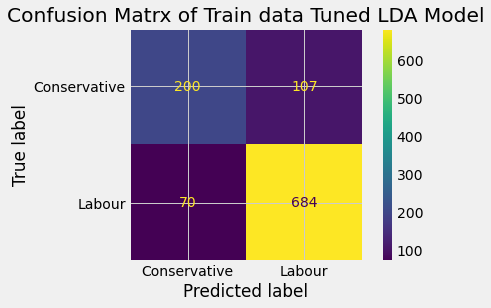

In [118]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');
plot_confusion_matrix(best_model,X_train,y_train,cmap='viridis');
plt.title('Confusion Matrx of Train data Tuned LDA Model')

              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Text(0.5, 1.0, 'Confusion Matrx of Test data Tuned LDA Model')

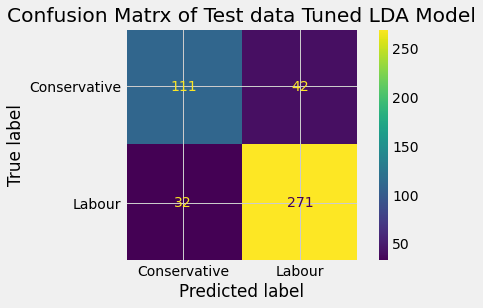

In [119]:
## Confusion matrix on the test data
print(classification_report(y_test, ytest_predict),'\n');
plot_confusion_matrix(best_model,X_test,y_test);
plt.title('Confusion Matrx of Test data Tuned LDA Model')

Text(0.5, 1.0, 'ROC Curve -LDA Tuned Model')

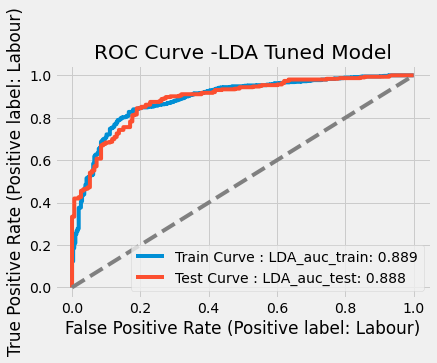

In [120]:
LDA_pred_train_prob = best_model.predict_proba(X_train)
LDA_pred_test_prob = best_model.predict_proba(X_test)

LDA_auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
LDA_auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LDA_auc_train: '+str(round(LDA_auc_train,3)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LDA_auc_test: '+ str(round(LDA_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Tuned Model')

.

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

### KNN Model

In [121]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Training Performance

In [122]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8567389255419415 0.7035830618892508 0.9190981432360743


              precision    recall  f1-score   support

Conservative       0.78      0.70      0.74       307
      Labour       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



Text(0.5, 1.0, 'Confusion Matrix - Train KNN-Base Model')

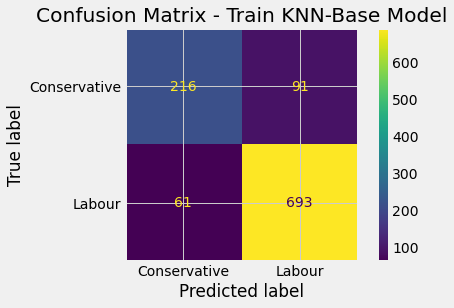

In [123]:
print(classification_report(y_train, KNN_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.title('Confusion Matrix - Train KNN-Base Model')

### Test Performance

In [124]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.8048245614035088 0.6405228758169934 0.8877887788778878


              precision    recall  f1-score   support

Conservative       0.74      0.64      0.69       153
      Labour       0.83      0.89      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



Text(0.5, 1.0, 'Confusion Matrix - Test KNN-Base Model')

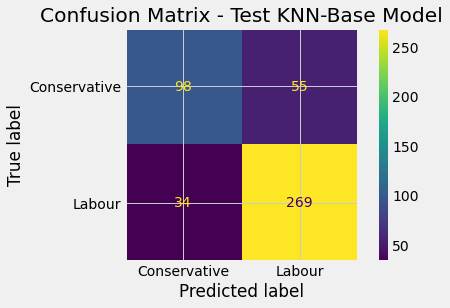

In [125]:
print(classification_report(y_test, KNN_test_predict))
plot_confusion_matrix(KNN_model,X_test, y_test);
plt.title('Confusion Matrix - Test KNN-Base Model')

Text(0.5, 1.0, 'ROC Curve -KNN Base Model')

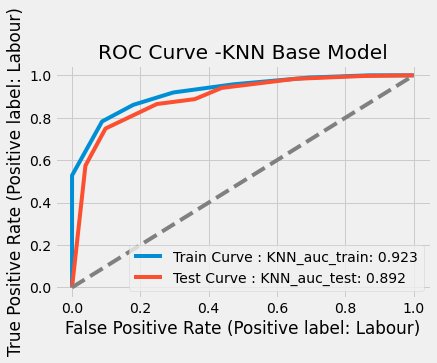

In [126]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Base Model')

### TUNING OF KNN MODEL WITH LESS MISCLASSIFICATION ERROR

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

 Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [127]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.21052631578947367,
 0.1907894736842105,
 0.17982456140350878,
 0.19517543859649122,
 0.18201754385964908,
 0.1885964912280702,
 0.1864035087719298,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735]

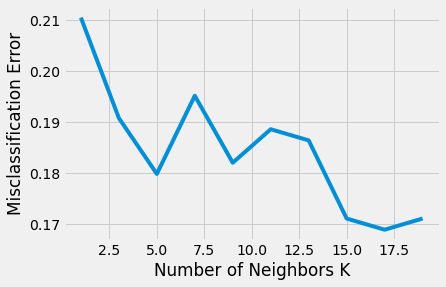

In [128]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**Misclassification Error is low at K =15 so we will take 15 Neighbors**

In [129]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

### Training Performance

In [130]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8388312912346843 0.6840390879478827 0.9018567639257294


              precision    recall  f1-score   support

Conservative       0.74      0.68      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

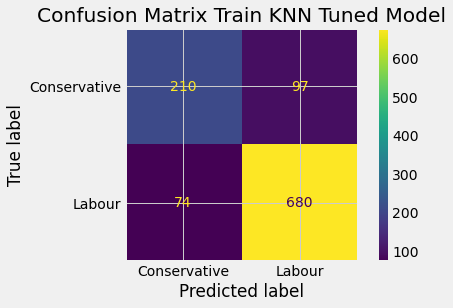

In [131]:
print(classification_report(y_train, KNN_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.title('Confusion Matrix Train KNN Tuned Model')

### Test Performance

In [132]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.831140350877193 0.6797385620915033 0.9075907590759076


              precision    recall  f1-score   support

Conservative       0.79      0.68      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

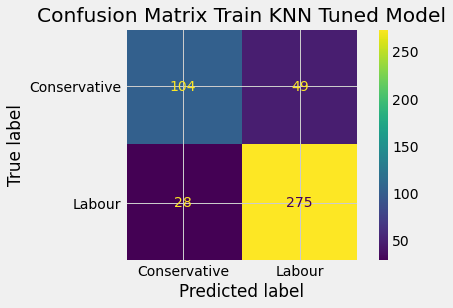

In [133]:
print(classification_report(y_test, KNN_test_predict))
plot_confusion_matrix(KNN_model,X_test, y_test);
plt.title('Confusion Matrix Train KNN Tuned Model')

Text(0.5, 1.0, 'ROC Curve -KNN Tuned Model')

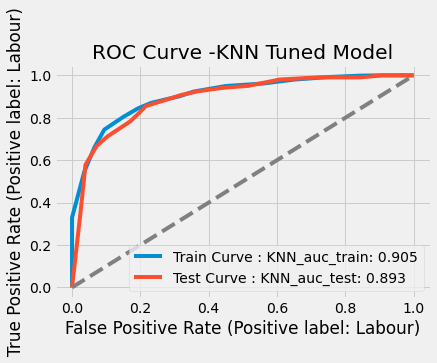

In [134]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Tuned Model')

### Naive Bayes Model

In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score

In [136]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Training Performance

In [137]:
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train)
NB_train_recall_score_Labour = recall_score(y_train,NB_train_predict,labels=None,pos_label='Labour')
NB_train_recall_score_Conservative = recall_score(y_train,NB_train_predict,labels=None,pos_label='Conservative')
print(NB_train_score,NB_train_recall_score_Conservative,NB_train_recall_score_Labour)

0.8360037700282752 0.6938110749185668 0.8938992042440318


              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix of Train- Base Model NB')

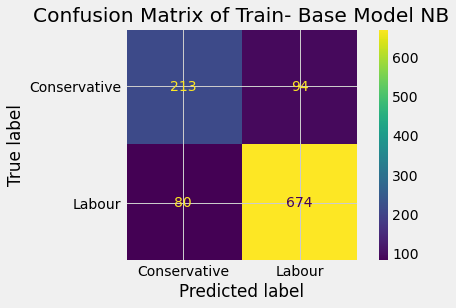

In [138]:
print(classification_report(y_train, NB_train_predict))
plot_confusion_matrix(NB_model,X_train,y_train);
plt.title('Confusion Matrix of Train- Base Model NB')

### Test Performance

In [139]:
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score_Labour = recall_score(y_test,NB_test_predict,labels=None,pos_label='Labour')
NB_test_recall_score_Conservative = recall_score(y_test,NB_test_predict,labels=None,pos_label='Conservative')
print(NB_test_score,NB_test_recall_score_Conservative,NB_test_recall_score_Labour)

0.8201754385964912 0.7254901960784313 0.8679867986798679


              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrix of Test- Base Model NB')

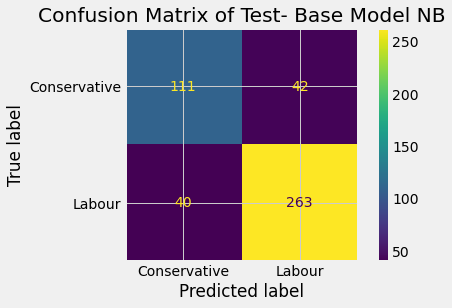

In [140]:
print(classification_report(y_test, NB_test_predict))
plot_confusion_matrix(NB_model, X_test, y_test);
plt.title('Confusion Matrix of Test- Base Model NB')

Text(0.5, 1.0, 'ROC Curve -NB Base Model')

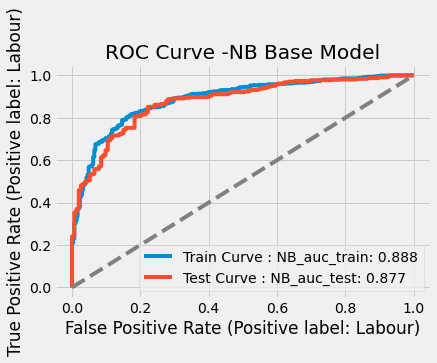

In [141]:
NB_pred_train_prob = NB_model.predict_proba(X_train)
NB_pred_test_prob = NB_model.predict_proba(X_test)

NB_auc_train = roc_auc_score(y_train,NB_pred_train_prob[:,1])
NB_auc_test = roc_auc_score(y_test,NB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(NB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : NB_auc_train: '+str(round(NB_auc_train,3)));
plot_roc_curve(NB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : NB_auc_test: '+ str(round(NB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB Base Model')

.

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Bagging on Naive Bays Classifier and on random forrest it's given after this question

In [142]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=NB_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=1)

### Training Performance

In [143]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.8350612629594723 0.6872964169381107 0.8952254641909815


              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrx- Train Bagging with Naive Bays')

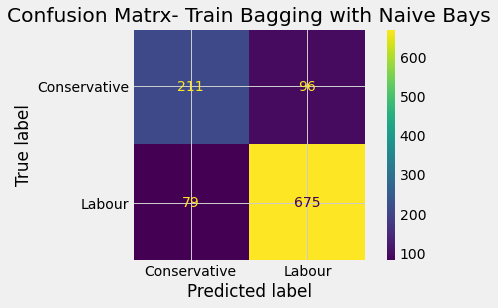

In [144]:
print(classification_report(y_train, Bagging_train_predict))
plot_confusion_matrix(Bagging_model,X_train, y_train);
plt.title('Confusion Matrx- Train Bagging with Naive Bays')

### Test Performance

In [145]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8223684210526315 0.7254901960784313 0.8712871287128713


              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrx- Test Bagging with Naive Bays')

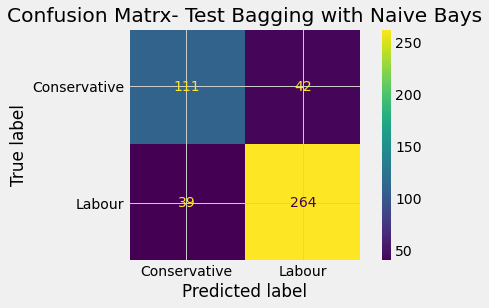

In [146]:
print(classification_report(y_test, Bagging_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusion Matrx- Test Bagging with Naive Bays')

Text(0.5, 1.0, 'ROC Curve -NB -Bagging Model')

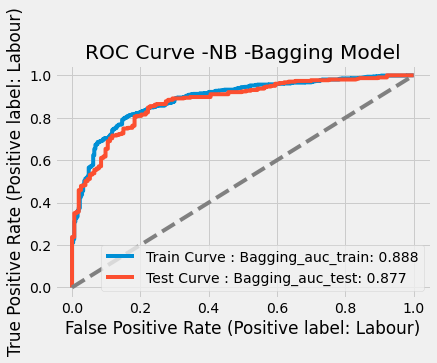

In [147]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB -Bagging Model')

### Random Forest

In [148]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Training Performance

In [149]:
## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score_Labour = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Labour')
RF_train_recall_score_Conservative = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Conservative')
print(RF_train_score,RF_train_recall_score_Conservative,RF_train_recall_score_Labour)

0.9924599434495759 0.9837133550488599 0.9960212201591512


              precision    recall  f1-score   support

Conservative       0.99      0.98      0.99       307
      Labour       0.99      1.00      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'RF-Train Confusion Matrix')

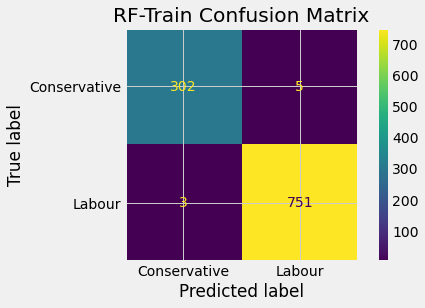

In [150]:
print(classification_report(y_train, RF_train_predict))
plot_confusion_matrix(RF_model, X_train,y_train);
plt.title('RF-Train Confusion Matrix')

### Test Performace

In [151]:
## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score_Labour = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Labour')
RF_test_recall_score_Conservative = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Conservative')
print(RF_test_score,RF_test_recall_score_Conservative,RF_test_recall_score_Labour)

0.8114035087719298 0.6405228758169934 0.8976897689768977


              precision    recall  f1-score   support

Conservative       0.76      0.64      0.70       153
      Labour       0.83      0.90      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



Text(0.5, 1.0, 'RF-Test Confusion Matrix')

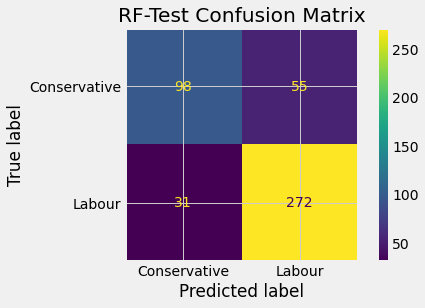

In [152]:
print(classification_report(y_test, RF_test_predict))
plot_confusion_matrix(RF_model,X_test,y_test);
plt.title('RF-Test Confusion Matrix')

### Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

### Training Performance

In [154]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.9613572101790764 0.8859934853420195 0.9920424403183024


              precision    recall  f1-score   support

Conservative       0.98      0.89      0.93       307
      Labour       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



Text(0.5, 1.0, 'Confusiuon Matrix Bagging -Random forest Model')

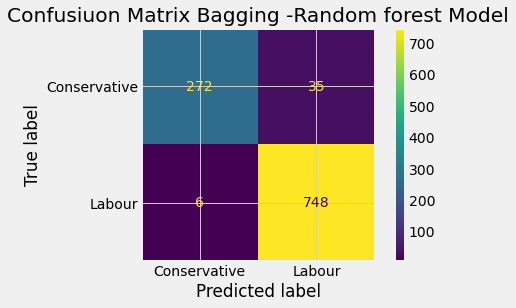

In [155]:
print(classification_report(y_train, Bagging_train_predict))
plot_confusion_matrix(Bagging_model,X_train, y_train);
plt.title('Confusiuon Matrix Bagging -Random forest Model')

### Test Performance

In [156]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8289473684210527 0.673202614379085 0.9075907590759076


              precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusiuon Matrix Bagging  Test -Random forest Model')

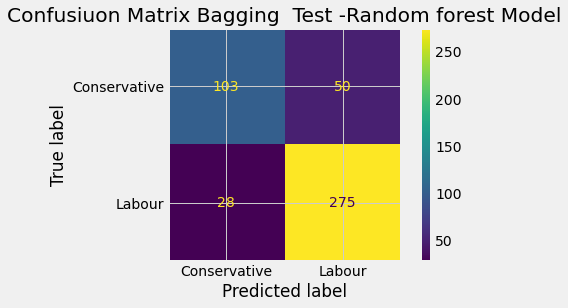

In [157]:
print(classification_report(y_test, Bagging_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusiuon Matrix Bagging  Test -Random forest Model')

Text(0.5, 1.0, 'ROC Curve -RF -Bagging Model')

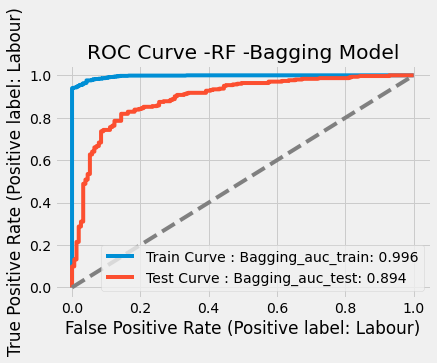

In [158]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -RF -Bagging Model')

### Ada Boost

In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

### Training Performance

In [161]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score_Labour = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Labour')
ADB_train_recall_score_Conservative = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Conservative')
print(ADB_train_score,ADB_train_recall_score_Conservative,ADB_train_recall_score_Labour)

0.8407163053722903 0.6807817589576547 0.9058355437665783


              precision    recall  f1-score   support

Conservative       0.75      0.68      0.71       307
      Labour       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Adaboost Classifier -Train Confusion Matrix')

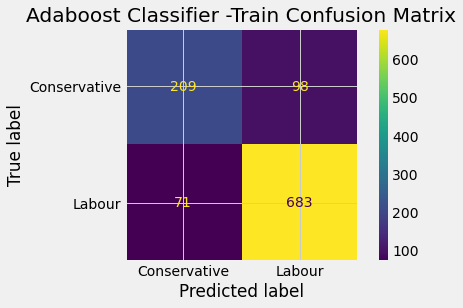

In [162]:
print(classification_report(y_train, ADB_train_predict))
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.title('Adaboost Classifier -Train Confusion Matrix')

### Test Performance

In [163]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score_Labour = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Labour')
ADB_test_recall_score_Conservative = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Conservative')
print(ADB_test_score,ADB_test_recall_score_Conservative,ADB_test_recall_score_Labour)

0.8223684210526315 0.6928104575163399 0.8877887788778878


              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       153
      Labour       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Adaboost Classifier -Test Confusion Matrix')

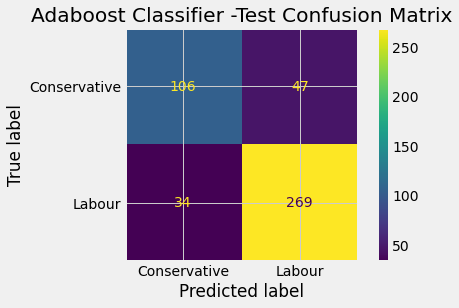

In [164]:
print(classification_report(y_test, ADB_test_predict))
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.title('Adaboost Classifier -Test Confusion Matrix')

Text(0.5, 1.0, 'ROC Curve -ADA-Boost Model')

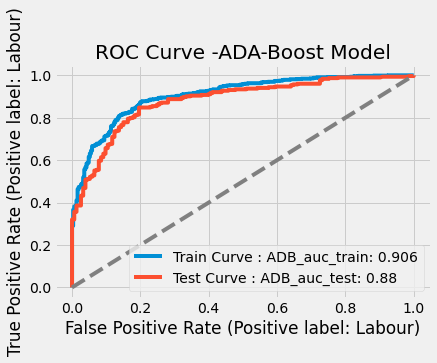

In [165]:
ADB_pred_train_prob = ADB_model.predict_proba(X_train)
ADB_pred_test_prob = ADB_model.predict_proba(X_test)

ADB_auc_train = roc_auc_score(y_train,ADB_pred_train_prob[:,1])
ADB_auc_test = roc_auc_score(y_test,ADB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(ADB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : ADB_auc_train: '+str(round(ADB_auc_train,3)));
plot_roc_curve(ADB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : ADB_auc_test: '+ str(round(ADB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -ADA-Boost Model')

### Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

### Training Performance GREDIENT BOOST

In [167]:
## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score_Labour = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Labour')
gbcl_train_recall_score_Conservative = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Conservative')
print(gbcl_train_score,gbcl_train_recall_score_Conservative,gbcl_train_recall_score_Labour)

0.8868991517436381 0.7719869706840391 0.9336870026525199


              precision    recall  f1-score   support

Conservative       0.83      0.77      0.80       307
      Labour       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



Text(0.5, 1.0, 'Gredient Boost -Train-Confusion Matrix')

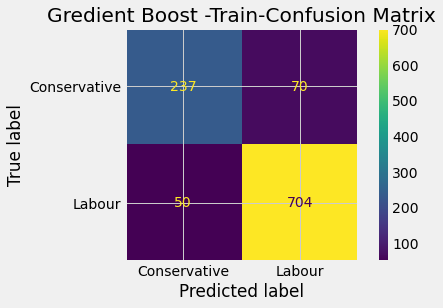

In [168]:
print(classification_report(y_train, gbcl_train_predict))
plot_confusion_matrix(gbcl,X_train,y_train);
plt.title('Gredient Boost -Train-Confusion Matrix')

### Test Performance GREDIENT BOOST

In [169]:
## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score_Labour = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Labour')
gbcl_test_recall_score_Conservative = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Conservative')
print(gbcl_test_score,gbcl_test_recall_score_Conservative,gbcl_test_recall_score_Labour)

0.831140350877193 0.6862745098039216 0.9042904290429042


              precision    recall  f1-score   support

Conservative       0.78      0.69      0.73       153
      Labour       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Gredient Boost -Test-Confusion Matrix')

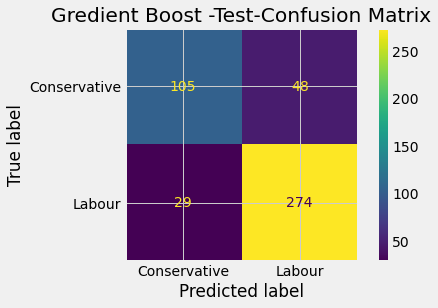

In [170]:
print(classification_report(y_test, gbcl_test_predict))
plot_confusion_matrix(gbcl,X_test,y_test);
plt.title('Gredient Boost -Test-Confusion Matrix')

In [171]:
gbcl_train_predict_prob = gbcl.predict_proba(X_train)
gbcl_test_predict_prob = gbcl.predict_proba(X_test)
pred_train_prob = gbcl.predict_proba(X_train)
pred_test_prob = gbcl.predict_proba(X_test)

gbcl_auc_train = roc_auc_score(y_train,gbcl_train_predict_prob[:,1])
gbcl_auc_test = roc_auc_score(y_test,gbcl_test_predict_prob[:,1])
print(gbcl_auc_train,gbcl_auc_test)


0.9458501455861895 0.8952522703250718


Text(0.5, 1.0, 'ROC-AUC Curve -Gredient Boost')

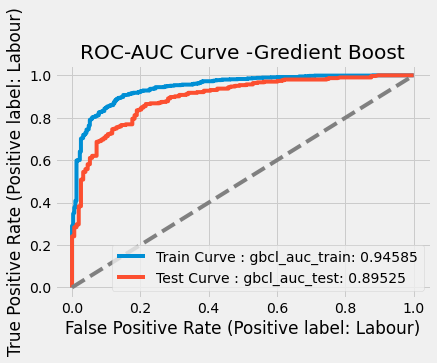

In [172]:
fig,ax = plt.subplots()
plot_roc_curve(gbcl, X_train,y_train,ax=ax, 
               label = 'Train Curve : gbcl_auc_train: '+str(round(gbcl_auc_train,5)));
plot_roc_curve(gbcl, X_test, y_test, ax=ax,
              label = 'Test Curve : gbcl_auc_test: '+ str(round(gbcl_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -Gredient Boost')

### Decision Tree

In [173]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Data

In [174]:
## Performance Matrix on train data set
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score_Labour = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Labour')
DT_train_recall_score_Conservative = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Conservative')
print(DT_train_score,DT_train_recall_score_Conservative,DT_train_recall_score_Labour)

0.9924599434495759 1.0 0.9893899204244032


              precision    recall  f1-score   support

Conservative       0.97      1.00      0.99       307
      Labour       1.00      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'Decision Tree -Train Confusion Matrix')

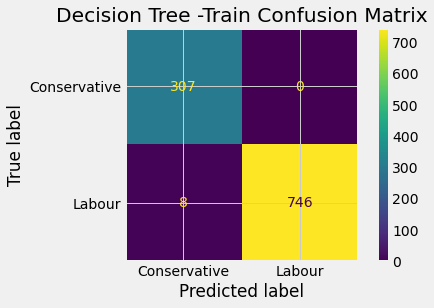

In [175]:
print(classification_report(y_train, DT_train_predict))
plot_confusion_matrix(DT_model,X_train,y_train);
plt.title('Decision Tree -Train Confusion Matrix')

### Test Performance

In [176]:
## Performance Matrix on test data set
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score_Labour = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Labour')
DT_test_recall_score_Conservative = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Conservative')
print(DT_test_score,DT_test_recall_score_Conservative,DT_test_recall_score_Labour)

0.7609649122807017 0.6274509803921569 0.8283828382838284


              precision    recall  f1-score   support

Conservative       0.65      0.63      0.64       153
      Labour       0.81      0.83      0.82       303

    accuracy                           0.76       456
   macro avg       0.73      0.73      0.73       456
weighted avg       0.76      0.76      0.76       456



Text(0.5, 1.0, 'Decision Tree -Test Confusion Matrix')

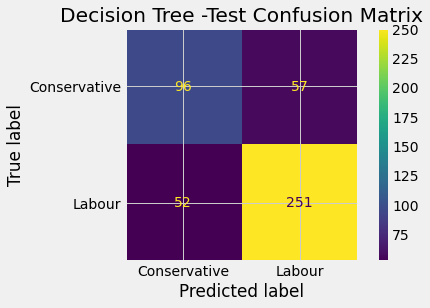

In [177]:
print(classification_report(y_test, DT_test_predict))
plot_confusion_matrix(DT_model, X_test, y_test);
plt.title('Decision Tree -Test Confusion Matrix')

Text(0.5, 1.0, 'ROC Curve -ADA-Boost Model')

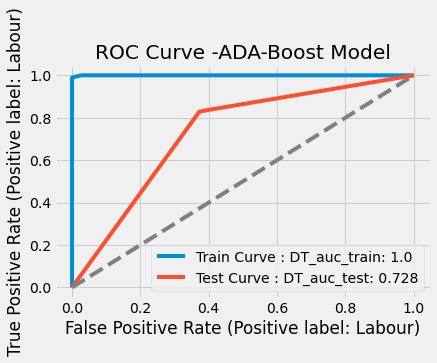

In [178]:
DT_pred_train_prob = DT_model.predict_proba(X_train)
DT_pred_test_prob = DT_model.predict_proba(X_test)

DT_auc_train = roc_auc_score(y_train,DT_pred_train_prob[:,1])
DT_auc_test = roc_auc_score(y_test,DT_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(DT_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : DT_auc_train: '+str(round(DT_auc_train,3)));
plot_roc_curve(DT_model, X_test, y_test, ax=ax,
              label = 'Test Curve : DT_auc_test: '+ str(round(DT_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -ADA-Boost Model')

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### Comparison of Different Models

In [179]:

model_names = ['Naive-Bayes','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df


Train Recall  Test Recall  Accuracy Train  Accuracy Test
Naive-Bayes        0.893899     0.867987        0.836004       0.820175
LDA                0.907162     0.894389        0.833176       0.837719
ADABoost           0.905836     0.887789        0.840716       0.822368
GradientBoost      0.933687     0.904290        0.886899       0.831140
KNN                0.901857     0.907591        0.838831       0.831140
DecisionTree       0.989390     0.828383        0.992460       0.760965
RF                 0.996021     0.897690        0.992460       0.811404
Bagging            0.992042     0.907591        0.961357       0.828947

So as per the test data, 
best performing model is - Linear Discriminant Analysis

Best Performing models are - Decision Tree ,  Random Forest and Bagging

However are these best performing models overfitted??

Let's look at the performance on the test data set

## Conclusion

**So we will select models which have performed approximately similar on the train and test data set and apply SMOTE on the same to check if the performance improves or not eg. Naive Bayes and KNN**

## SMOTE 

In [180]:
!pip install imblearn

In [181]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [182]:
sm = SMOTE(random_state=2)

In [183]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [184]:
y_train.value_counts()

Labour          754
Conservative    307
Name: vote, dtype: int64

In [185]:
y_train_res.value_counts()

Labour          754
Conservative    754
Name: vote, dtype: int64

In [186]:
X_train.shape, X_train_res.shape

((1061, 8), (1508, 8))

## Naive Bayes with SMOTE

In [187]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

### Training Performance

In [188]:
## Performance Matrix on train data set with SMOTE
NBSM_train_predict = NB_SM_model.predict(X_train_res)
NBSM_train_score = NB_SM_model.score(X_train_res, y_train_res)
# NBSM_train_recall = NB_SM_model.recall_score(y_train_res,NBSM_train_predict)
print(NBSM_train_score)

0.8342175066312998


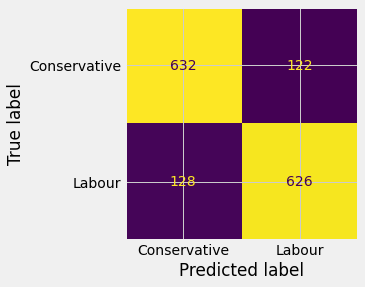

In [189]:
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res,
                     colorbar=False);

In [190]:
print(classification_report(y_train_res ,NBSM_train_predict))

              precision    recall  f1-score   support

Conservative       0.83      0.84      0.83       754
      Labour       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



### Test Performance

In [191]:
## Performance Matrix on test data set
NBSM_test_predict = NB_SM_model.predict(X_test)
NBSM_test_score = NB_SM_model.score(X_test, y_test)
print(NBSM_test_score)

0.8026315789473685


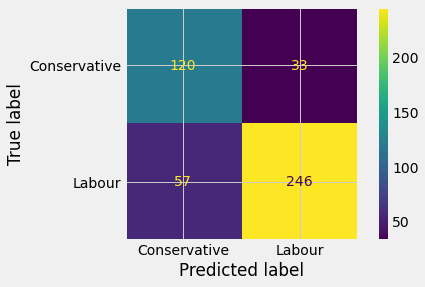

In [192]:
plot_confusion_matrix(NB_SM_model,X_test,y_test);

In [193]:
print(classification_report(y_test, NBSM_test_predict))

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.81      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



## KNN With SMOTE

In [194]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

### Training Performance

In [195]:
## Performance Matrix on train data set
KNN_SM_train_predict = KNN_SM_model.predict(X_train_res)
KNN_SM_train_score = KNN_SM_model.score(X_train_res, y_train_res)
print(KNN_SM_train_score)

0.8885941644562334


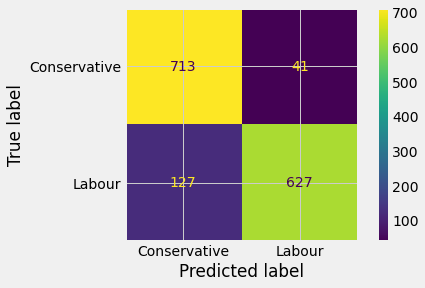

In [196]:
plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res);

In [197]:
print(classification_report(y_train_res, KNN_SM_train_predict))

              precision    recall  f1-score   support

Conservative       0.85      0.95      0.89       754
      Labour       0.94      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



### Test Performance

In [198]:
## Performance Matrix on test data set
KNN_SM_test_predict = KNN_SM_model.predict(X_test)
KNN_SM_test_score = KNN_SM_model.score(X_test, y_test)
print(KNN_SM_test_score)

0.8048245614035088


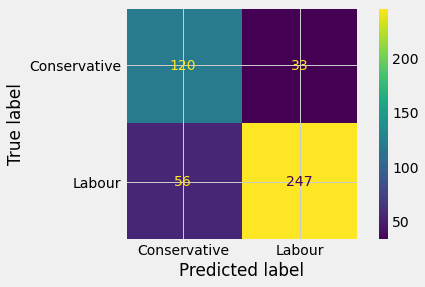

In [199]:
plot_confusion_matrix(KNN_SM_model,X_test,y_test);

In [200]:
print(classification_report(y_test, KNN_SM_test_predict))

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.82      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



## Conclusion after SMOTE

- Recall for Naive Bayes decresed significantly.
- Huge Difference between the train and test dataset Recall value,Accuracy  for KNN 

**Note: SMOTE as a technique is generally applied if minority class is below 5%.** 

You are advised to perform SMOTE on other models as well to compare the result

In [201]:
model_names = ['Naive-Bayes SMOTE','KNN SMOTE']


Accuracy_Train = [NBSM_train_score,
                KNN_SM_train_score]
Accuracy_Test = [NBSM_test_score,
                KNN_SM_test_score]

recall_df1 = pd.DataFrame({'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df1

Accuracy Train  Accuracy Test
Naive-Bayes SMOTE        0.834218       0.802632
KNN SMOTE                0.888594       0.804825

In [202]:
model_names = ['Naive-Bayes','LR','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LR_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LR_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LR_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LR_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df

Train Recall  Test Recall  Accuracy Train  Accuracy Test
Naive-Bayes        0.893899     0.867987        0.836004       0.820175
LR                 0.909814     0.884488        0.830349       0.831140
LDA                0.907162     0.894389        0.833176       0.837719
ADABoost           0.905836     0.887789        0.840716       0.822368
GradientBoost      0.933687     0.904290        0.886899       0.831140
KNN                0.901857     0.907591        0.838831       0.831140
DecisionTree       0.989390     0.828383        0.992460       0.760965
RF                 0.996021     0.897690        0.992460       0.811404
Bagging            0.992042     0.907591        0.961357       0.828947

## Cross Validation on Naive Bayes Model

In [203]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores # accuracy scores

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

In [204]:
rec_scores = cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
rec_scores # recall scores on each iteration of the 10 fold cross validation

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

In [205]:
rec_scores.mean() # average recall score across all iterations of 10 fold cv

0.830242825607064

### After 10 fold cross validation, scores both on  data set a for all 10 folds are almost same. 
### Hence our model is valid.
### Students are advised to perform CV on other models and compare the results.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).
Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model.**

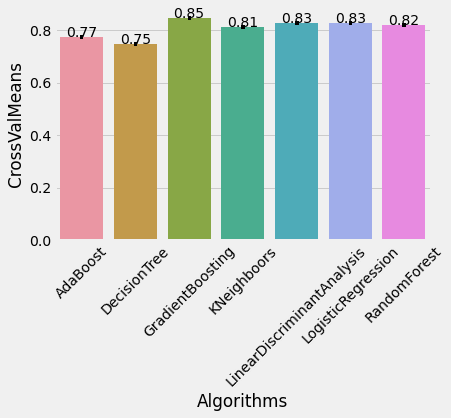

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
K_fold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 1

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(),random_state=random_state,learning_rate=0.1))
cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())



for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     ]
    })

groupedvalues = cv_frame.groupby('Algorithms').sum().reset_index()

g =sns.barplot(x='Algorithms',y="CrossValMeans",data=groupedvalues, **{'xerr':cv_std})
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.CrossValMeans, round(row.CrossValMeans,2), color='black', ha="center")



# cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
#                 palette="husl", orient = "h", **{'xerr':cv_std})

# cv_plot.set_xlabel("Mean Accuracy")
# cv_plot = cv_plot.set_title("CV Scores")


In [207]:
groupedvalues = cv_frame.groupby('Algorithms').sum().reset_index()
groupedvalues

Algorithms  CrossValMeans  CrossValErrors
0                    AdaBoost       0.774758        0.032942
1                DecisionTree       0.748360        0.026929
2            GradientBoosting       0.845415        0.037358
3                 KNeighboors       0.810589        0.029713
4  LinearDiscriminantAnalysis       0.828487        0.030502
5          LogisticRegression       0.827526        0.025642
6                RandomForest       0.819053        0.034136

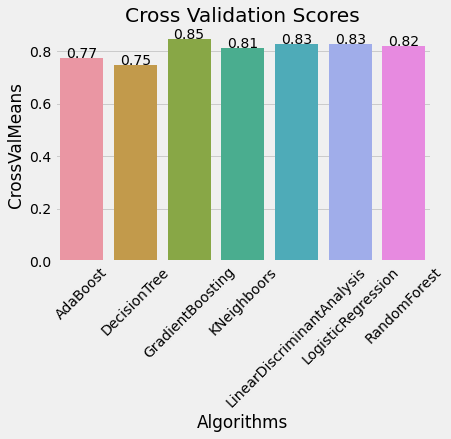

In [208]:
g =sns.barplot(x='Algorithms',y="CrossValMeans",data=groupedvalues)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45)
g.set_title("Cross Validation Scores")

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.CrossValMeans, round(row.CrossValMeans,2), color='black', ha="center")

## 1.8 Based on these predictions, what are the insights? 

**Recommendations:** -

	Collect more data like ratings on their previous leadership qualities (How they have p erformed previously), Religion of the respondent etc. to gain more insight .

	CNBE can take Online surveys so that it can reduce their actual cost on surveys in res ult they can collect more data.

	CNBE can also give free eBooks or online Coupons to the voters if they participate in surveys.

	Company can collect the ratings on the attitude of leader towards Current issues


# Problem 2: Text Analysis

 In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941 President John F. Kennedy in 1961 President Richard Nixon in 1973 Find the number of characters, words and sentences for the mentioned documents.

## Imprting the libraries

In [209]:
## !pip install wordcloud

In [210]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
from wordcloud import WordCloud

In [211]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [212]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt_s = inaugural.raw('1941-Roosevelt.txt')
Kennedy_s = inaugural.raw('1961-Kennedy.txt')
Nixon_s =inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\NIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### Number of Charecters in each text file

In [213]:
Roosevelt_s_characters = len(Roosevelt_s)
print('Number of Characters in Roosevelt Speetch :',Roosevelt_s_characters)

Kennedy_s_characters = len(Kennedy_s)
print('Number of Characters in Kennedy Speetch :',Kennedy_s_characters)

Nixon_s_characters = len(Nixon_s)
print('Number of Characters in Nixon Speetch :',Nixon_s_characters)

Number of Characters in Roosevelt Speetch : 7571
Number of Characters in Kennedy Speetch : 7618
Number of Characters in Nixon Speetch : 9991


### Number of Words in the Documents

In [214]:
Rs = inaugural.words('1941-Roosevelt.txt')
no_of_words = Rs
print('Number of Words in Roosevelt Speetch :',len(no_of_words))
Ks = inaugural.words('1961-Kennedy.txt')
no_of_words = Ks
print('Number of Words in Kennedy Speetch :',len(no_of_words))
Ns =inaugural.words('1973-Nixon.txt')
no_of_words = Ns
print('Number of Words in Nixon Speetch :',len(no_of_words))

Number of Words in Roosevelt Speetch : 1536
Number of Words in Kennedy Speetch : 1546
Number of Words in Nixon Speetch : 2028


In [215]:
Rs = inaugural.raw('1941-Roosevelt.txt')
no_of_words = Rs.split()
print('Number of Words in Roosevelt Speetch :',len(no_of_words))
Ks = inaugural.raw('1961-Kennedy.txt')
no_of_words = Ks.split()
print('Number of Words in Kennedy Speetch :',len(no_of_words))
Ns =inaugural.raw('1973-Nixon.txt')
no_of_words = Ns.split()
print('Number of Words in Nixon Speetch :',len(no_of_words))

Number of Words in Roosevelt Speetch : 1360
Number of Words in Kennedy Speetch : 1390
Number of Words in Nixon Speetch : 1819


### Number of Sentences in the Document

In [216]:
Sentences=inaugural.sents('1941-Roosevelt.txt')

print('Number of Sentences in Roosevelt Speetch :',len(Sentences))

Sentences=inaugural.sents('1961-Kennedy.txt')
print('Number of Sentences in Kennedy Speetch :',len(Sentences))

Sentences=inaugural.sents('1973-Nixon.txt')
print('Number of Sentences in Nixon Speetch :',len(Sentences))

Number of Sentences in Roosevelt Speetch : 68
Number of Sentences in Kennedy Speetch : 52
Number of Sentences in Nixon Speetch : 69


## 2.2 Remove all the stopwords from all three speeches.

### Removal of Stopwords from 1941-Roosevelt Speech

In [217]:
Roosevelt_s = inaugural.raw('1941-Roosevelt.txt')

In [218]:
r = pd.DataFrame({'Text': Roosevelt_s}, index = [0])

In [219]:
r['Text'][0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [220]:
r['word_count'] = r['Text'].apply(lambda x: len(str(x).split()))

In [221]:
r

Text  word_count
0  On each national day of inauguration since 178...        1360

In [222]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Collecting all the Stopwords & Punctuations

In [223]:
from nltk.corpus import stopwords

In [224]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [225]:
stop = stopwords.words('english')
stop_test = stopwords.words('english') +list(string.punctuation)

In [226]:
# printing all the stopwords
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [227]:
stop_test.sort()

### Adding '--' to the stopword dictionary

In [228]:
stop_test.append('--')

In [229]:
r['count_stop'] = r['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
r

Text  word_count  count_stop
0  On each national day of inauguration since 178...        1360         654

### List of sopwords present in the text

In [230]:
r['stop'] = r['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test ]))
print(r['stop'][0])

['each', 'of', 'the', 'have', 'their', 'of', 'to', 'the', 'the', 'of', 'the', 'was', 'to', 'and', 'a', 'the', 'of', 'the', 'was', 'to', 'that', 'from', 'from', 'this', 'the', 'of', 'the', 'is', 'to', 'that', 'and', 'its', 'from', 'from', 'there', 'has', 'a', 'in', 'the', 'of', 'to', 'for', 'a', 'and', '--', 'to', 'what', 'our', 'in', 'has', 'and', 'to', 'what', 'we', 'are', 'and', 'what', 'we', 'we', 'do', 'we', 'the', 'of', 'of', 'are', 'not', 'by', 'the', 'of', 'but', 'by', 'the', 'of', 'the', 'of', 'a', 'is', 'and', 'a', 'a', 'of', 'a', 'is', 'the', 'of', 'the', 'of', 'its', 'will', 'to', 'are', 'who', 'are', 'who', 'that', 'as', 'a', 'of', 'and', 'a', 'of', 'is', 'or', 'by', 'a', 'of', 'and', 'for', 'some', 'and', 'have', 'the', 'of', 'the', '--', 'and', 'that', 'is', 'an', 'we', 'that', 'this', 'is', 'not', 'when', 'the', 'of', 'this', 'by', 'a', 'we', 'that', 'this', 'is', 'not', 'were', 'in', 'the', 'of', '--', 'but', 'we', 'have', 'been', '--', 'for', 'the', 'of', 'this', 'they

### collecting the Uppercase letters

In [231]:
r['upper'] = r['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
r

Text  word_count  count_stop  \
0  On each national day of inauguration since 178...        1360         654   

                                                stop  upper  
0  [each, of, the, have, their, of, to, the, the,...      3

In [232]:
r['processed_text'] = r['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [233]:
r['processed_text'][0]

'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states. in washington\'s day the task of the people was to create and weld together a nation. in lincoln\'s day the task of the people was to preserve that nation from disruption from within. in this day the task of the people is to save that nation and its institutions from disruption from without. to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction. lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live. there are men who doubt this. there are men who believe that democracy, as a form of 

In [234]:
r['processed_text'] = r['processed_text'].str.replace('[^a-zA-Z\s]','')
r['processed_text'][0]

'on each national day of inauguration since  the people have renewed their sense of dedication to the united states in washingtons day the task of the people was to create and weld together a nation in lincolns day the task of the people was to preserve that nation from disruption from within in this day the task of the people is to save that nation and its institutions from disruption from without to us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be if we do not we risk the real peril of inaction lives of nations are determined not by the count of years but by the lifetime of the human spirit the life of a man is threescore years and ten a little more a little less the life of a nation is the fullness of the measure of its will to live there are men who doubt this there are men who believe that democracy as a form of government and a frame of life

### Removal of stopwords

In [235]:
r['processed_text'] = r['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))

In [236]:
r['processed_text'][0]

'national day inauguration since people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material things vi

In [237]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [238]:
r['processed_text'] = r['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))

In [239]:
r['processed_text'][0]

'nation day inaugur sinc peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fact

### President Kennedy Speech Stop Word Removal

In [240]:
Kennedy_s = inaugural.raw('1961-Kennedy.txt')

In [241]:
k = pd.DataFrame({'Text': Kennedy_s}, index = [0])

In [242]:
k['Text'][0]

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [243]:
k['word_count'] = k['Text'].apply(lambda x: len(str(x).split()))

In [244]:
k

Text  word_count
0  Vice President Johnson, Mr. Speaker, Mr. Chief...        1390

In [245]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Collecting all the Stopwords & Punctuations

In [246]:
from nltk.corpus import stopwords

#stop = stopwords.words('english')
stop_test = stopwords.words('english') +list(string.punctuation)

In [247]:
# printing all the stopwords
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [248]:
stop_test.sort()

### Adding '--' to the stopword dictionary

In [249]:
stop_test.append('--')
stop_test.append('us')
stop_test.append('let')

In [250]:
k['count_stop'] = k['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
k

Text  word_count  count_stop
0  Vice President Johnson, Mr. Speaker, Mr. Chief...        1390         661

### List of sopwords present in the text

In [251]:
k['stop'] = k['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test]))
print(k['stop'][0])

['we', 'not', 'a', 'of', 'but', 'a', 'of', '--', 'an', 'as', 'as', 'a', '--', 'as', 'as', 'have', 'before', 'you', 'and', 'the', 'same', 'our', 'a', 'and', 'is', 'very', 'in', 'his', 'the', 'to', 'all', 'of', 'and', 'all', 'of', 'the', 'same', 'for', 'which', 'our', 'are', 'at', 'the', '--', 'the', 'that', 'the', 'of', 'not', 'from', 'the', 'of', 'the', 'but', 'from', 'the', 'of', 'not', 'that', 'we', 'are', 'the', 'of', 'that', 'the', 'from', 'this', 'and', 'to', 'and', 'that', 'the', 'has', 'been', 'to', 'a', 'of', '--', 'in', 'this', 'by', 'by', 'a', 'and', 'of', 'our', '--', 'and', 'to', 'or', 'the', 'of', 'those', 'to', 'which', 'this', 'has', 'been', 'and', 'to', 'which', 'we', 'are', 'at', 'and', 'the', 'it', 'us', 'or', 'that', 'we', 'any', 'any', 'any', 'any', 'any', 'in', 'to', 'the', 'and', 'the', 'of', 'we', '--', 'and', 'those', 'and', 'we', 'we', 'the', 'of', 'there', 'is', 'we', 'do', 'in', 'a', 'of', 'there', 'is', 'we', 'can', 'do', '--', 'for', 'we', 'not', 'a', 'at',

### collecting the Uppercase letters

In [252]:
k['upper'] = k['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
k

Text  word_count  count_stop  \
0  Vice President Johnson, Mr. Speaker, Mr. Chief...        1390         661   

                                                stop  upper  
0  [we, not, a, of, but, a, of, --, an, as, as, a...      5

In [253]:
k['processed_text'] = k['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [254]:
k['processed_text'][0]

'vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago. the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god. we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation 

In [255]:
k['processed_text'] = k['processed_text'].str.replace('[^a-zA-Z\s]','')
k['processed_text'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom  symbolizing an end as well as a beginning  signifying renewal as well as change for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago the world is very different now for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state but from the hand of god we dare not forget today that we are the heirs of that first revolution let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of americans  born in this c

### Removal of stopwords

In [256]:
k['processed_text'] = k['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))

In [257]:
k['processed_text'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success lib

In [258]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [259]:
k['processed_text'] = k['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))

In [260]:
k['processed_text'][0]

'vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world everi nation know whether wish well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend unit littl ca

### Nixon Speetch Stop Words Removal

In [261]:
Nixon_s = inaugural.raw('1973-Nixon.txt')

In [262]:
n = pd.DataFrame({'Text': Nixon_s}, index = [0])

In [263]:
n['Text'][0]

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [264]:
n['word_count'] = n['Text'].apply(lambda x: len(str(x).split()))

In [265]:
n

Text  word_count
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1819

In [266]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Collecting all the Stopwords & Punctuations

In [267]:
from nltk.corpus import stopwords

#stop = stopwords.words('english')
stop_test = stopwords.words('english') +list(string.punctuation)

In [268]:
# printing all the stopwords
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [269]:
stop_test.sort()

### Adding '--' to the stopword dictionary

In [270]:
stop_test.append('--')
stop_test.append('us')
stop_test.append('let')

In [271]:
stop_test

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [272]:
n['count_stop'] = n['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
n

Text  word_count  count_stop
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1819         950

### List of sopwords present in the text

In [273]:
n['stop'] = n['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test]))
print(n['stop'][0])

['and', 'my', 'of', 'this', 'and', 'we', 'we', 'here', 'was', 'in', 'by', 'the', 'of', 'and', 'of', 'at', 'we', 'here', 'we', 'on', 'the', 'of', 'a', 'of', 'in', 'the', 'before', 'us', 'we', 'that', 'us', 'that', 'this', 'we', 'are', 'about', 'to', 'will', 'not', 'be', 'what', 'other', 'have', 'so', 'a', 'of', 'and', 'that', 'to', 'at', 'and', 'us', 'that', 'this', 'will', 'be', 'what', 'it', 'can', 'a', 'of', 'in', 'which', 'we', 'the', 'and', 'the', 'of', 'as', 'we', 'our', 'as', 'a', 'from', 'our', 'for', 'to', 'our', 'and', 'by', 'our', 'to', 'and', 'to', 'we', 'were', 'to', 'the', 'for', 'a', 'and', 'more', 'of', 'the', 'of', 'the', 'of', 'will', 'be', 'as', 'the', 'of', 'the', 'the', 'of', 'a', 'in', 'the', 'we', 'in', 'the', 'is', 'not', 'the', 'which', 'is', 'an', 'between', 'but', 'a', 'which', 'can', 'for', 'to', 'is', 'that', 'we', 'both', 'the', 'and', 'the', 'of', 'in', 'that', 'we', 'in', 'to', 'the', 'there', 'will', 'be', 'no', 'we', 'in', 'to', 'there', 'will', 'be', '

### collecting the Uppercase letters

In [274]:
n['upper'] = n['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
n

Text  word_count  count_stop  \
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1819         950   

                                                stop  upper  
0  [and, my, of, this, and, we, we, here, was, in...     14

In [275]:
n['processed_text'] = n['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [276]:
n['processed_text'] = n['processed_text'].str.replace('[^a-zA-Z\s]','')
n['processed_text'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together when we met here four years ago america was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home as we meet here today we stand on the threshold of a new era of peace in the world the central question before us is how shall we use that peace let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad let us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of america as we enter our third century as a nation this past year saw farreaching results from our new policies for peace by continuing to revitalize our traditional friendships and by our missions to pek

## Removal of stopwords

In [277]:
n['processed_text'] = n['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))

In [278]:
n['processed_text'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintai

In [279]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [280]:
n['processed_text'] = n['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))

In [281]:
n['processed_text'][0]

'mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question shall use peac resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw farreach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom clearli understand new natur

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

### Roosewelt inaugural address Top 3 Words

In [282]:
from nltk.probability import FreqDist
fdist = FreqDist(r['processed_text'][0].split())
print(fdist)

<FreqDist with 387 samples and 623 outcomes>


In [283]:
fdist.most_common(10)

[('nation', 17),
 ('know', 10),
 ('peopl', 9),
 ('spirit', 9),
 ('life', 9),
 ('democraci', 9),
 ('us', 8),
 ('america', 8),
 ('live', 7),
 ('year', 7)]

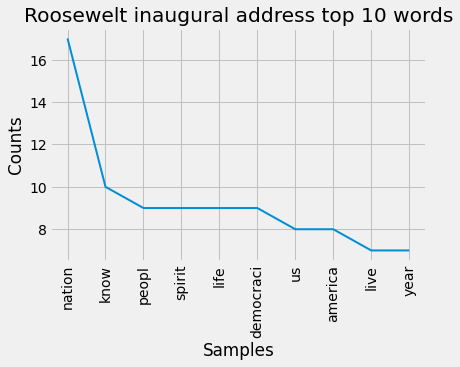

In [284]:
#frequency distribution plot
import matplotlib.pyplot as plt
plt.title("Roosewelt inaugural address top 10 words")
fdist.plot(10 , cumulative=False)
plt.show()

### Kennedy inaugural address Top 3 Words

In [285]:
from nltk.probability import FreqDist
fdist2 = FreqDist(k['processed_text'][0].split())
print(fdist2)

<FreqDist with 413 samples and 663 outcomes>


In [286]:
fdist2.most_common(10)

[('power', 9),
 ('world', 8),
 ('nation', 8),
 ('side', 8),
 ('new', 7),
 ('pledg', 7),
 ('ask', 6),
 ('citizen', 5),
 ('peac', 5),
 ('shall', 5)]

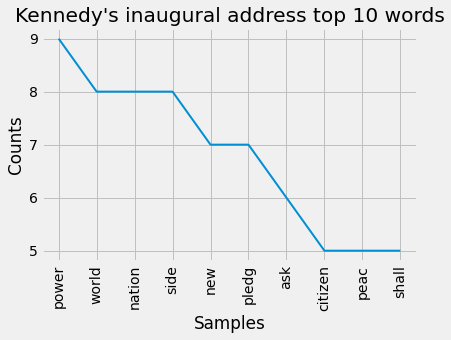

In [287]:
#frequency distribution plot
import matplotlib.pyplot as plt
plt.title("Kennedy's inaugural address top 10 words")
fdist2.plot(10 , cumulative=False)
plt.show()

### Nixon inaugural address Top 3 Words

In [288]:
from nltk.probability import FreqDist
fdist1 = FreqDist(n['processed_text'][0].split())
print(fdist1)

<FreqDist with 360 samples and 784 outcomes>


In [289]:
fdist1.most_common(10)

[('america', 21),
 ('peac', 19),
 ('world', 18),
 ('respons', 17),
 ('new', 15),
 ('nation', 15),
 ('govern', 10),
 ('great', 9),
 ('year', 9),
 ('home', 9)]

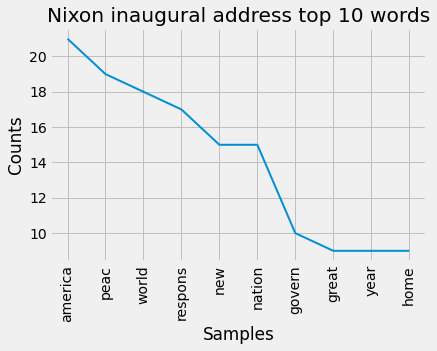

In [290]:
#frequency distribution plot
import matplotlib.pyplot as plt
plt.title("Nixon inaugural address top 10 words")
fdist1.plot(10 , cumulative=False)
plt.show()

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

### Word Cloud for Roosewelt (after cleaning)

Word Cloud for Roosewelt (after cleaning)!!


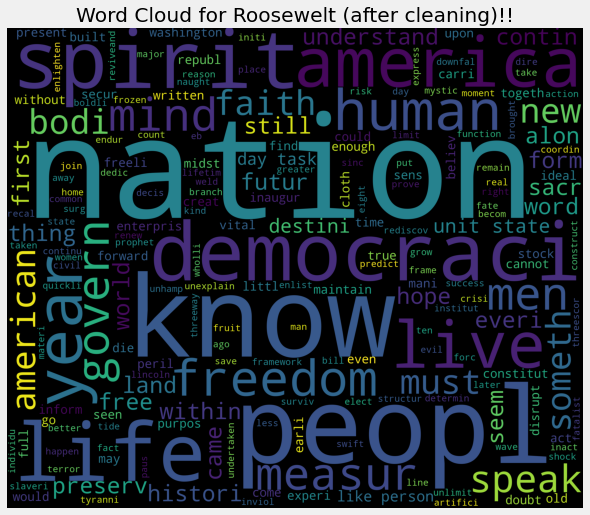

In [291]:
data = r['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Roosewelt (after cleaning)!!")
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosewelt (after cleaning)!!")
plt.show();

### Word cloud for Kennedy Speetch

Word Cloud for Kennedy Speech (after cleaning)!!


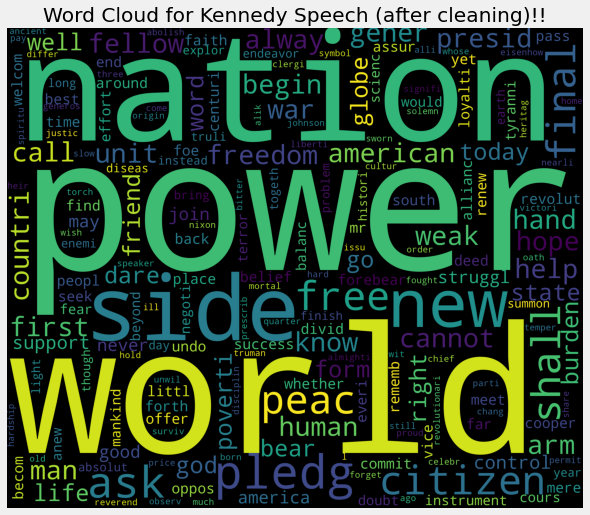

In [292]:
data_kennedy = k['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data_kennedy)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show();

### Word Cloud for Nixon Speetch

Word Cloud for Nixon Speech (after cleaning)!!


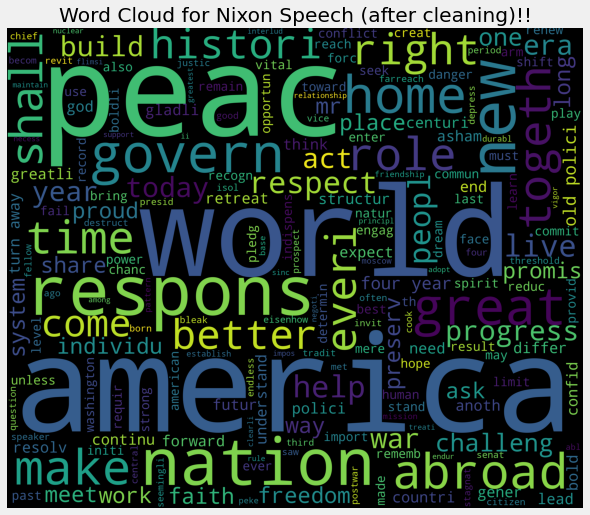

In [293]:
data_Nixon = n['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data_Nixon)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Nixon Speech (after cleaning)!!")
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show();

**PGP DSBA FEB_2021_A**

**HARSH ALKESH PANDYA**

# Thank you !